### Iniciando  Verificação dos Dados Consolidados .parquet

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
# Lendo arquivo consolidado parquet
df_sisagua = pd.read_parquet('dados_consolidados.parquet')

In [4]:
# Verificando linhas e colunas do arquivo consolidado
df_sisagua.shape

(1284530, 36)

In [5]:
# Verificando dados
df_sisagua.head()

regiao_geografica  uf                 regional_de_saude  \
0          NORDESTE  CE     22 REGIONAL DE SAUDE CASCAVEL   
1          NORDESTE  CE       18 REGIONAL DE SAUDE IGUATU   
2          NORDESTE  CE  19 REGIONAL DE SAUDE BREJO SANTO   
3          NORDESTE  CE      13 REGIONAL DE SAUDE TIANGUA   
4          NORDESTE  CE      02 REGIONAL DE SAUDE CAUCAIA   

                   municipio codigo_ibge numero_da_amostra motivo_da_coleta  \
0                PINDORETAMA      231085      200134000030           Rotina   
1  DEPUTADO IRAPUAN PINHEIRO      230426      201811000070           Rotina   
2                     AURORA      230170      201918000117           Rotina   
3                    UBAJARA      231360      201314000212           Rotina   
4            GENERAL SAMPAIO      230460      200217000023           Rotina   

  tipo_da_forma_de_abastecimento codigo_forma_de_abastecimento  \
0                            SAI                 I231085000011   
1                            SAA                 S230426000001   
2                            SAA                 S230170000001   
3                            SAC                 C231360000093   
4                            SAA                 S230460000001   

                      nome_da_forma_de_abastecimento  ... longitude  \
0                                      SITIO CORREIA  ...       NaN   
1                          SAAE DEP IRAPUAN PINHEIRO  ...       NaN   
2                                     SISTEMA AURORA  ...       NaN   
3  CAIXA DAGUA DE DISTRIBUICAO PUBLICA CACHOEIRA ...  ...       NaN   
4                             CAGECE GENERAL SAMPAIO  ...       NaN   

                     parametro  analise_realizada data_da_analise  ld  lq  \
0            Cor Aparente (uH)               None            None NaN NaN   
1             Escherichia coli               None            None NaN NaN   
2  Cloro residual livre (mg/L)           EM_CAMPO            None NaN NaN   
3             Escherichia coli               None            None NaN NaN   
4            Coliformes totais               None            None NaN NaN   

  resultado                      providencia ano_coleta   data_processamento  
0         5                             None       2020  2025-05-02 00:52:41  
1   AUSENTE                             None       2020  2025-05-02 00:52:41  
2     0,001  TOMADAS AS DEVIDAS PROVIDENCIAS       2020  2025-05-02 00:52:41  
3   AUSENTE                             None       2020  2025-05-02 00:52:41  
4   AUSENTE                             None       2020  2025-05-02 00:52:41  

[5 rows x 36 columns]

In [6]:
# Verificando colunas
df_sisagua.columns

Index(['regiao_geografica', 'uf', 'regional_de_saude', 'municipio',
       'codigo_ibge', 'numero_da_amostra', 'motivo_da_coleta',
       'tipo_da_forma_de_abastecimento', 'codigo_forma_de_abastecimento',
       'nome_da_forma_de_abastecimento', 'nome_da_eta_uta', 'ano', 'mes',
       'data_da_coleta', 'hora_da_coleta', 'data_do_laudo',
       'data_de_registro_no_sisagua', 'procedencia_da_coleta',
       'ponto_de_coleta', 'descricao_do_local', 'zona', 'categoria_area',
       'area', 'tipo_do_local', 'local', 'latitude', 'longitude', 'parametro',
       'analise_realizada', 'data_da_analise', 'ld', 'lq', 'resultado',
       'providencia', 'ano_coleta', 'data_processamento'],
      dtype='object')

In [7]:
# Verificando se todos os anos estão presentes no dataframe consolidado
df_sisagua['ano'].value_counts().sort_index(ascending=True)

ano
2020    250902
2021    260280
2022    261582
2023    256980
2024    254786
Name: count, dtype: int64

### Subir dados brutos para o Postgres - Docker

In [ ]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.engine import Engine

# Configuração do Postgres
usuario = 'postgres'        
senha = '1234'            
host = 'localhost'            
porta = '5433'                  
banco = 'sisagua_db'

# Criar a string de conexão
engine: Engine = create_engine(f'postgresql+psycopg2://{usuario}:{senha}@{host}:{porta}/{banco}', echo=True)

# Lendo o arquivo parquet
caminho_arquivo = 'dados_consolidados.parquet'
print(f"Lendo arquivo: {caminho_arquivo} ...")
df_sisagua = pd.read_parquet(caminho_arquivo)

# Mostrar shape para confirmar
print(f"Tamanho do DataFrame: {df_sisagua.shape}")

# Carga para o Postgres
print("Iniciando carga para o Postgres...")
df_sisagua.to_sql('sisagua_bruto', con=engine, if_exists='replace', index=False)
print("✅ Carga concluída com sucesso!")


Lendo arquivo: dados_consolidados.parquet ...
Tamanho do DataFrame: (1284530, 36)
Iniciando carga para o Postgres...
2025-05-02 17:02:27,366 INFO sqlalchemy.engine.Engine select pg_catalog.version()
2025-05-02 17:02:27,367 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-05-02 17:02:27,372 INFO sqlalchemy.engine.Engine select current_schema()
2025-05-02 17:02:27,374 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-05-02 17:02:27,378 INFO sqlalchemy.engine.Engine show standard_conforming_strings
2025-05-02 17:02:27,379 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-05-02 17:02:27,384 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-05-02 17:02:27,786 INFO sqlalchemy.engine.Engine SELECT pg_catalog.pg_class.relname 
FROM pg_catalog.pg_class JOIN pg_catalog.pg_namespace ON pg_catalog.pg_namespace.oid = pg_catalog.pg_class.relnamespace 
WHERE pg_catalog.pg_class.relname = %(table_name)s AND pg_catalog.pg_class.relkind = ANY (ARRAY[%(param_1)s, %(param_2)s, %(param_3)s, %(param_4)s, %(par

### Análise Exploratória dos Dados

Os dados brutos baixados da API do Sisagua contemplam os parâmetros básicos analisados nos anos de 2020,2021,2022,2023 e 2024. Porém vamos focar no ano de 2024, que é o ano mais recente, e trabalhar em cima do tipo_da_forma_de_abastecimento == SAA.

Vale ressaltar que utilizaremos a Portaria Nº888/2021 do Ministério da Saúde como apoio para o entendimento dos dados. 

In [ ]:
# Filtrar o ano de 2024
df_2024 = df_sisagua[df_sisagua['ano'] == 2024]

In [9]:
# Verificando que no df_2024 só temos dados de 2024
df_2024['ano'].value_counts()

ano
2024    254786
Name: count, dtype: int64

In [10]:
# Verificando a quantidade de linhas e colunas
df_2024.shape

(254786, 36)

In [11]:
# Verificando os dados
df_2024.head()

regiao_geografica  uf              regional_de_saude     municipio  \
1029744          NORDESTE  CE     20 REGIONAL DE SAUDE CRATO  CAMPOS SALES   
1029745          NORDESTE  CE    09 REGIONAL DE SAUDE RUSSAS        RUSSAS   
1029746          NORDESTE  CE     20 REGIONAL DE SAUDE CRATO       SALITRE   
1029747          NORDESTE  CE  04 REGIONAL DE SAUDE BATURITE      BATURITE   
1029748          NORDESTE  CE   15 REGIONAL DE SAUDE CRATEUS       PORANGA   

        codigo_ibge numero_da_amostra motivo_da_coleta  \
1029744        None      242019000159           Rotina   
1029745        None      240906000081           Rotina   
1029746        None      242025000032           Rotina   
1029747        None      240410000233           Rotina   
1029748        None      241412000172           Rotina   

        tipo_da_forma_de_abastecimento codigo_forma_de_abastecimento  \
1029744                            SAA                 S230270000003   
1029745                            SAA                 S231180000013   
1029746                            SAA                 S231195000001   
1029747                            SAA                 S230210000001   
1029748                            SAA                 S231100000001   

        nome_da_forma_de_abastecimento  ... longitude          parametro  \
1029744             SISAR CARMELOPOLIS  ...       NaN  Coliformes totais   
1029745        SISAR COMPLEXO DO PEIXE  ...       NaN   Escherichia coli   
1029746              CAGECE DE SALITRE  ...       NaN    Fluoreto (mg/L)   
1029747                CAGECE BATURITE  ... -38.88374    Fluoreto (mg/L)   
1029748                 CAGECE PORANGA  ...       NaN  Coliformes totais   

         analise_realizada data_da_analise  ld  lq resultado providencia  \
1029744               None            None NaN NaN  PRESENTE        None   
1029745               None            None NaN NaN   AUSENTE        None   
1029746               None            None NaN NaN      0,00        None   
1029747               None            None NaN NaN       0,0        None   
1029748               None            None NaN NaN  PRESENTE        None   

        ano_coleta   data_processamento  
1029744       2024  2025-05-02 03:34:44  
1029745       2024  2025-05-02 03:34:44  
1029746       2024  2025-05-02 03:34:44  
1029747       2024  2025-05-02 03:34:44  
1029748       2024  2025-05-02 03:34:44  

[5 rows x 36 columns]

In [12]:
# Verificando os tipos de dados
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254786 entries, 1029744 to 1284529
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   regiao_geografica               254786 non-null  object 
 1   uf                              254786 non-null  object 
 2   regional_de_saude               254786 non-null  object 
 3   municipio                       254786 non-null  object 
 4   codigo_ibge                     212 non-null     object 
 5   numero_da_amostra               254786 non-null  object 
 6   motivo_da_coleta                254786 non-null  object 
 7   tipo_da_forma_de_abastecimento  254786 non-null  object 
 8   codigo_forma_de_abastecimento   254786 non-null  object 
 9   nome_da_forma_de_abastecimento  254786 non-null  object 
 10  nome_da_eta_uta                 2497 non-null    object 
 11  ano                             254786 non-null  int64  
 12  mes           

In [13]:
# Selecionando as colunas que serão utilizadas na análise, tendo em vista que tem colunas com valor NaN
colunas_seleciondas = ['regiao_geografica', 'uf', 'regional_de_saude', 'municipio',
       'numero_da_amostra', 'motivo_da_coleta', 'tipo_da_forma_de_abastecimento', 'nome_da_forma_de_abastecimento', 
       'ano', 'mes', 'data_da_coleta','data_de_registro_no_sisagua', 'procedencia_da_coleta',
       'descricao_do_local', 'parametro', 'resultado']

In [14]:
# Atribuindo as colunas selecionadas ao df_2024
df_2024 = df_2024[colunas_seleciondas]

In [15]:
# Verificando novo shape de df_2024
df_2024.shape

(254786, 16)

In [16]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254786 entries, 1029744 to 1284529
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   regiao_geografica               254786 non-null  object
 1   uf                              254786 non-null  object
 2   regional_de_saude               254786 non-null  object
 3   municipio                       254786 non-null  object
 4   numero_da_amostra               254786 non-null  object
 5   motivo_da_coleta                254786 non-null  object
 6   tipo_da_forma_de_abastecimento  254786 non-null  object
 7   nome_da_forma_de_abastecimento  254786 non-null  object
 8   ano                             254786 non-null  int64 
 9   mes                             254786 non-null  int64 
 10  data_da_coleta                  254786 non-null  object
 11  data_de_registro_no_sisagua     254786 non-null  object
 12  procedencia_da_coleta       

In [17]:
# Verificando municipios unicos
verificacao = df_2024['municipio'].unique() 
verificacao

array(['CAMPOS SALES', 'RUSSAS', 'SALITRE', 'BATURITE', 'PORANGA',
       'ALTO SANTO', 'JIJOCA DE JERICOACOARA', 'ARACOIABA',
       'SAO BENEDITO', 'APUIARES', 'TIANGUA', 'FORTIM', 'BELA CRUZ',
       'IPAUMIRIM', 'ITAREMA', 'PACAJUS', 'MARANGUAPE', 'MARACANAU',
       'NOVA RUSSAS', 'PEDRA BRANCA', 'MILAGRES', 'UMARI', 'ARNEIROZ',
       'UBAJARA', 'PIRES FERREIRA', 'IGUATU', 'SANTA QUITERIA',
       'SANTANA DO ACARAU', 'ABAIARA', 'ITAPIUNA', 'SAO LUIS DO CURU',
       'ITAITINGA', 'PALMACIA', 'CANINDE', 'QUIXERE', 'ARACATI',
       'AQUIRAZ', 'GENERAL SAMPAIO', 'CARIUS', 'CRUZ', 'ALCANTARAS',
       'FORTALEZA', 'SOBRAL', 'SENADOR SA', 'LIMOEIRO DO NORTE', 'CRATO',
       'PACATUBA', 'RERIUTABA', 'CEDRO', 'EUSEBIO', 'MUCAMBO',
       'BARROQUINHA', 'VARJOTA', 'BARREIRA', 'GRANJA', 'CARIRE',
       'REDENCAO', 'CATUNDA', 'HORIZONTE', 'JUAZEIRO DO NORTE',
       'BOA VIAGEM', 'MORRINHOS', 'BARRO', 'ACARAU', 'CARNAUBAL',
       'GUAIUBA', 'BREJO SANTO', 'JAGUARIBARA', 'TABULEIRO DO N

In [18]:
# Contando a quantidade de municipios que enviaram resultados. É para ter 184 municipios
quantidade_municipios = len(verificacao)
quantidade_municipios

184

In [19]:
# Quais parâmetros reportados no sisagua em 2024?
df_2024['parametro'].value_counts()

parametro
Turbidez (uT)                      50627
Escherichia coli                   50374
Coliformes totais                  50265
Cloro residual livre (mg/L)        47457
Cor Aparente (uH)                  34122
Fluoreto (mg/L)                    13524
pH                                  8395
Cloro residual combinado (mg/L)       20
Dióxido de Cloro (mg/L)                2
Name: count, dtype: int64

In [20]:
# Tipos de forma de abastecimento
df_2024['tipo_da_forma_de_abastecimento'].value_counts()

tipo_da_forma_de_abastecimento
SAA           232562
SAC            14599
SAI             6983
CARRO-PIPA       642
Name: count, dtype: int64

Quando olhamos para os tipos de forma de abastecimento, fica claro que os SAA estão em maiores quantidades, e outra, como são monitorados pelas concessionárias, e devem seguir uma legislação de monitoramento de qualidade da água, optamos por fazer um filtro em SAA - Sistemas de Abastecimento de Água.

In [21]:
# Filtrando de df_saa_2024 somente os tipos de abastecimento de agua SAA
df_saa_2024 = df_2024[df_2024['tipo_da_forma_de_abastecimento'] == 'SAA'].copy()

In [22]:
# Verificando novo shape
df_saa_2024.shape

(232562, 16)

Tratamento nos tipos de dados

In [23]:
# Criando a coluna resultado_num e convertendo os valores numéricos com vírgula para float
df_saa_2024['resultado_num'] = pd.to_numeric(df_saa_2024['resultado'].str.replace(',', '.'), errors='coerce')

# Convertendo data_da_coleta e data_de_registro_no_sisagua para os formatos corretos de data
df_saa_2024['data_da_coleta'] = pd.to_datetime(df_saa_2024['data_da_coleta'], errors='coerce')
df_saa_2024['data_de_registro_no_sisagua'] = pd.to_datetime(df_saa_2024['data_de_registro_no_sisagua'], errors='coerce')


In [24]:
# Verificando após transformação dos dados
df_saa_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232562 entries, 1029744 to 1284529
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   regiao_geografica               232562 non-null  object        
 1   uf                              232562 non-null  object        
 2   regional_de_saude               232562 non-null  object        
 3   municipio                       232562 non-null  object        
 4   numero_da_amostra               232562 non-null  object        
 5   motivo_da_coleta                232562 non-null  object        
 6   tipo_da_forma_de_abastecimento  232562 non-null  object        
 7   nome_da_forma_de_abastecimento  232562 non-null  object        
 8   ano                             232562 non-null  int64         
 9   mes                             232562 non-null  int64         
 10  data_da_coleta                  232562 non-null  datet

In [108]:
# Criando função de classificação a partir dos valores maximos permitidos pela portaria 888/2021 do Ministerio da Saude

def classificar_conformidade(row):
    parametro = str(row['parametro']).strip().upper()
    valor = str(row['resultado']).strip().upper()
    valor_num = row['resultado_num']
    try:
        if parametro == 'TURBIDEZ (UT)':
            return 'CONFORME' if valor_num <= 5 else 'NÃO CONFORME'
        elif parametro == 'ESCHERICHIA COLI':
            return 'CONFORME' if valor == 'AUSENTE' else 'NÃO CONFORME'
        elif parametro == 'COLIFORMES TOTAIS':
            return 'CONFORME' if valor == 'AUSENTE' else 'NÃO CONFORME'
        elif parametro == 'CLORO RESIDUAL LIVRE (MG/L)':
            return 'CONFORME' if 0.2 <= valor_num <= 5.0 else 'NÃO CONFORME'
        elif parametro == 'PH':
            return 'CONFORME' if 6 <= valor_num <= 9.5 else 'NÃO CONFORME'
        elif parametro == 'COR APARENTE (UH)':
            return 'CONFORME' if valor_num < 15 else 'NÃO CONFORME'
        elif parametro == 'FLUORETO (MG/L)':
            return 'CONFORME' if valor_num <= 1.5 else 'NÃO CONFORME'
    except:
        return 'ERRO'
    return 'IGNORADO'

In [109]:
# Criando a colunas de conformidade e aplicando a função classificar_conformidade no df_saa_2024
df_saa_2024['conformidade'] = df_saa_2024.apply(classificar_conformidade, axis=1)
df_saa_2024.head(5)

regiao_geografica  uf              regional_de_saude     municipio  \
1029744          NORDESTE  CE     20 REGIONAL DE SAUDE CRATO  CAMPOS SALES   
1029745          NORDESTE  CE    09 REGIONAL DE SAUDE RUSSAS        RUSSAS   
1029746          NORDESTE  CE     20 REGIONAL DE SAUDE CRATO       SALITRE   
1029747          NORDESTE  CE  04 REGIONAL DE SAUDE BATURITE      BATURITE   
1029748          NORDESTE  CE   15 REGIONAL DE SAUDE CRATEUS       PORANGA   

        numero_da_amostra motivo_da_coleta tipo_da_forma_de_abastecimento  \
1029744      242019000159           Rotina                            SAA   
1029745      240906000081           Rotina                            SAA   
1029746      242025000032           Rotina                            SAA   
1029747      240410000233           Rotina                            SAA   
1029748      241412000172           Rotina                            SAA   

        nome_da_forma_de_abastecimento   ano  mes data_da_coleta  \
1029744             SISAR CARMELOPOLIS  2024    6     2024-06-12   
1029745        SISAR COMPLEXO DO PEIXE  2024    3     2024-03-20   
1029746              CAGECE DE SALITRE  2024    2     2024-02-20   
1029747                CAGECE BATURITE  2024   10     2024-10-14   
1029748                 CAGECE PORANGA  2024   11     2024-11-06   

        data_de_registro_no_sisagua             procedencia_da_coleta  \
1029744                  2024-07-17           SISTEMA DE DISTRIBUIÇÃO   
1029745                  2024-04-23  INTRA-DOMICILIAR / INTRA-PREDIAL   
1029746                  2024-04-15           SISTEMA DE DISTRIBUIÇÃO   
1029747                  2024-11-04           SISTEMA DE DISTRIBUIÇÃO   
1029748                  2024-11-14           SISTEMA DE DISTRIBUIÇÃO   

                          descricao_do_local          parametro resultado  \
1029744     SEDE DO DISTRITO DE CARMELÓPOLES  Coliformes totais  PRESENTE   
1029745                            UBS PEIXE   Escherichia coli   AUSENTE   
1029746          TRAVESSA SANTO INACIO N? 43    Fluoreto (mg/L)      0,00   
1029747  RUA MAJOR PEDRO CAT?O 110 - MONDEGO    Fluoreto (mg/L)       0,0   
1029748     AVENIDA DOUTOR EPITACIO DE PINHO  Coliformes totais  PRESENTE   

         resultado_num  conformidade    tipo_analise    regiao  
1029744            NaN  NÃO CONFORME  Microbiológica  Interior  
1029745            NaN      CONFORME  Microbiológica  Interior  
1029746            0.0      CONFORME  Físico-Química  Interior  
1029747            0.0      CONFORME  Físico-Química  Interior  
1029748            NaN  NÃO CONFORME  Microbiológica  Interior

In [110]:
# Criando função de classificação por tipo de análise

def classificar_tipo_analise(parametro):
    parametro = str(parametro).strip().upper()
    if parametro in ['COLIFORMES TOTAIS', 'ESCHERICHIA COLI']:
        return 'Microbiológica'
    elif parametro in ['TURBIDEZ (UT)', 'CLORO RESIDUAL LIVRE (MG/L)', 'PH', 'COR APARENTE (UH)', 'FLUORETO (MG/L)']:
        return 'Físico-Química'
    return 'Outros'

In [111]:
# Criando a coluna tipo_analise e aplicando a função classificar_tipo_analise no df_saa_2024
df_saa_2024['tipo_analise'] = df_saa_2024['parametro'].apply(classificar_tipo_analise)
df_saa_2024.head(5)

regiao_geografica  uf              regional_de_saude     municipio  \
1029744          NORDESTE  CE     20 REGIONAL DE SAUDE CRATO  CAMPOS SALES   
1029745          NORDESTE  CE    09 REGIONAL DE SAUDE RUSSAS        RUSSAS   
1029746          NORDESTE  CE     20 REGIONAL DE SAUDE CRATO       SALITRE   
1029747          NORDESTE  CE  04 REGIONAL DE SAUDE BATURITE      BATURITE   
1029748          NORDESTE  CE   15 REGIONAL DE SAUDE CRATEUS       PORANGA   

        numero_da_amostra motivo_da_coleta tipo_da_forma_de_abastecimento  \
1029744      242019000159           Rotina                            SAA   
1029745      240906000081           Rotina                            SAA   
1029746      242025000032           Rotina                            SAA   
1029747      240410000233           Rotina                            SAA   
1029748      241412000172           Rotina                            SAA   

        nome_da_forma_de_abastecimento   ano  mes data_da_coleta  \
1029744             SISAR CARMELOPOLIS  2024    6     2024-06-12   
1029745        SISAR COMPLEXO DO PEIXE  2024    3     2024-03-20   
1029746              CAGECE DE SALITRE  2024    2     2024-02-20   
1029747                CAGECE BATURITE  2024   10     2024-10-14   
1029748                 CAGECE PORANGA  2024   11     2024-11-06   

        data_de_registro_no_sisagua             procedencia_da_coleta  \
1029744                  2024-07-17           SISTEMA DE DISTRIBUIÇÃO   
1029745                  2024-04-23  INTRA-DOMICILIAR / INTRA-PREDIAL   
1029746                  2024-04-15           SISTEMA DE DISTRIBUIÇÃO   
1029747                  2024-11-04           SISTEMA DE DISTRIBUIÇÃO   
1029748                  2024-11-14           SISTEMA DE DISTRIBUIÇÃO   

                          descricao_do_local          parametro resultado  \
1029744     SEDE DO DISTRITO DE CARMELÓPOLES  Coliformes totais  PRESENTE   
1029745                            UBS PEIXE   Escherichia coli   AUSENTE   
1029746          TRAVESSA SANTO INACIO N? 43    Fluoreto (mg/L)      0,00   
1029747  RUA MAJOR PEDRO CAT?O 110 - MONDEGO    Fluoreto (mg/L)       0,0   
1029748     AVENIDA DOUTOR EPITACIO DE PINHO  Coliformes totais  PRESENTE   

         resultado_num  conformidade    tipo_analise    regiao  
1029744            NaN  NÃO CONFORME  Microbiológica  Interior  
1029745            NaN      CONFORME  Microbiológica  Interior  
1029746            0.0      CONFORME  Físico-Química  Interior  
1029747            0.0      CONFORME  Físico-Química  Interior  
1029748            NaN  NÃO CONFORME  Microbiológica  Interior

### Analise Exploratória - Parte Dois

Vamos inicialmente analisar o parâmetro Cloro residual livre (VMP Portaria 888/2021 = min 0,2 mg/L e max 5,0 mg/L).

A metodologia utilizada para detecção de Cloro Residual Livre mais utilizada é o D.P.D, e é possível medir utilizando o disco colorimetrico, que tem capacidade de quantificação até 4,0 mg/L, tem o pocket colorimeter que consegue medir com precisão até 10,0 mg/L, espectrofotômetro de bancada que mede até 5,0 mg/L e por fim, por titulação que mede até 20,0 mg/L.

Na minha experiência, nunca vi valores maiores do que 7,0 mg/L, logo vamos analisar os dados com ponto de corte 7,0 mg/L.

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
# Filtrar valores suspeitos (exemplo: > 7 mg/L)
suspeitos = df_saa_2024[
    (df_saa_2024['parametro'] == 'Cloro residual livre (mg/L)') & 
    (df_saa_2024['resultado_num'] >= 7)]

if not suspeitos.empty:
    print("\nValores suspeitos (> 7 mg/L):")
    display(suspeitos[['municipio', 'data_da_coleta', 'parametro', 'resultado_num']].sort_values(by='resultado_num', ascending=False))
else:
    print("✅ Nenhum valor suspeito (> 7 mg/L) encontrado.")


Valores suspeitos (> 7 mg/L):


municipio data_da_coleta                    parametro  \
1220404             ITAPIPOCA     2024-08-07  Cloro residual livre (mg/L)   
1071623                FORTIM     2024-05-17  Cloro residual livre (mg/L)   
1048495             ITAPIPOCA     2024-05-15  Cloro residual livre (mg/L)   
1034220               CANINDE     2024-03-20  Cloro residual livre (mg/L)   
1279933               CANINDE     2024-03-20  Cloro residual livre (mg/L)   
...                       ...            ...                          ...   
1146376        SENADOR POMPEU     2024-05-08  Cloro residual livre (mg/L)   
1075667  LAVRAS DA MANGABEIRA     2024-08-07  Cloro residual livre (mg/L)   
1275504  LAVRAS DA MANGABEIRA     2024-02-19  Cloro residual livre (mg/L)   
1222803  LAVRAS DA MANGABEIRA     2024-08-07  Cloro residual livre (mg/L)   
1205882  LAVRAS DA MANGABEIRA     2024-02-19  Cloro residual livre (mg/L)   

         resultado_num  
1220404        1421.00  
1071623        1045.00  
1048495        1015.00  
1034220         783.00  
1279933         783.00  
...                ...  
1146376           7.08  
1075667           7.00  
1275504           7.00  
1222803           7.00  
1205882           7.00  

[90 rows x 4 columns]

In [113]:
# Criar o DataFrame tratado removendo os suspeitos de 'Cloro residual livre (mg/L)' > 7
df_saa_2024_cloro = df_saa_2024[ ~(
        (df_saa_2024['parametro'] == 'Cloro residual livre (mg/L)') &
        (df_saa_2024['resultado_num'] >= 7))].copy()

print(f"Base tratada criada com {len(df_saa_2024_cloro)} registros (antes: {len(df_saa_2024)})")

Base tratada criada com 232472 registros (antes: 232562)


In [114]:
# Filtrar apenas os registros de Cloro Residual Livre
df_cloro = df_saa_2024_cloro[df_saa_2024_cloro['parametro'].str.contains('Cloro residual livre', case=False, na=False)]

# Verificar se existem dados
if not df_cloro.empty:
    # Calcular estatísticas
    estatisticas = {
        'Mínimo (mg/L)': df_cloro['resultado_num'].min(),
        'Máximo (mg/L)': df_cloro['resultado_num'].max(),
        'Média (mg/L)': df_cloro['resultado_num'].mean(),
        'Mediana (mg/L)': df_cloro['resultado_num'].median(),
        'Desvio Padrão': df_cloro['resultado_num'].std(),
        'Total de Análises': len(df_cloro)
    }
    
    # Exibir resultados
    print("🔍 Estatísticas do Cloro Residual Livre:")
    for stat, value in estatisticas.items():
        print(f"{stat}: {value:.2f}" if isinstance(value, (float, int)) else f"{stat}: {value}")
    
    # Análise adicional por mês/ano
    print("\n📅 Tendência Temporal:")
    mensal = df_cloro.groupby(['ano', 'mes'])['resultado_num'].mean().unstack()
    display(mensal.style.background_gradient(cmap='Blues'))
    
    # Top 5 municípios com maiores valores
    print("\n🏙️ Top 5 Municípios com Maiores Valores:")
    top_municipios = df_cloro.groupby('municipio')['resultado_num'].max().nlargest(5)
    display(top_municipios)
    
else:
    print("❌ Nenhum registro de Cloro Residual Livre encontrado.")
    print("Valores únicos de parâmetros:", df_saa_2024_cloro['parametro'].unique())

🔍 Estatísticas do Cloro Residual Livre:
Mínimo (mg/L): 0.00
Máximo (mg/L): 6.81
Média (mg/L): 2.23
Mediana (mg/L): 1.83
Desvio Padrão: 1.80
Total de Análises: 46744.00

📅 Tendência Temporal:



🏙️ Top 5 Municípios com Maiores Valores:


municipio
SENADOR POMPEU          6.81
CHORO                   6.80
CRUZ                    6.80
HORIZONTE               6.80
LAVRAS DA MANGABEIRA    6.80
Name: resultado_num, dtype: float64

In [115]:
# Após todo o tratamento acima, chegando em df_cloro, vamos verificar a presença ou não de outliers, e calcular quartis e limites
Q1 = df_cloro['resultado_num'].quantile(0.25)
Q3 = df_cloro['resultado_num'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR

# Mostrar os valores calculados
print(f"Valores calculados:")
print(f"Q1 (25º percentil): {Q1:.2f} mg/L")
print(f"Q3 (75º percentil): {Q3:.2f} mg/L")
print(f"IQR (Q3 - Q1): {IQR:.2f} mg/L")
print(f"Limite superior (Q3 + 1.5*IQR): {limite_superior:.2f} mg/L\n")

# Identificar outliers
outliers = df_cloro[df_cloro['resultado_num'] > limite_superior]
print(f"Total de outliers (valores > {limite_superior:.2f} mg/L): {len(outliers)}")

# Exibir tabela de outliers (se houver)
if not outliers.empty:
    display(outliers[['municipio', 'resultado_num']]
            .sort_values('resultado_num', ascending=False)
            .head(20))  # Mostra os 20 maiores outliers
else:
    print("Nenhum outlier encontrado.")

Valores calculados:
Q1 (25º percentil): 0.70 mg/L
Q3 (75º percentil): 3.50 mg/L
IQR (Q3 - Q1): 2.80 mg/L
Limite superior (Q3 + 1.5*IQR): 7.70 mg/L

Total de outliers (valores > 7.70 mg/L): 0
Nenhum outlier encontrado.


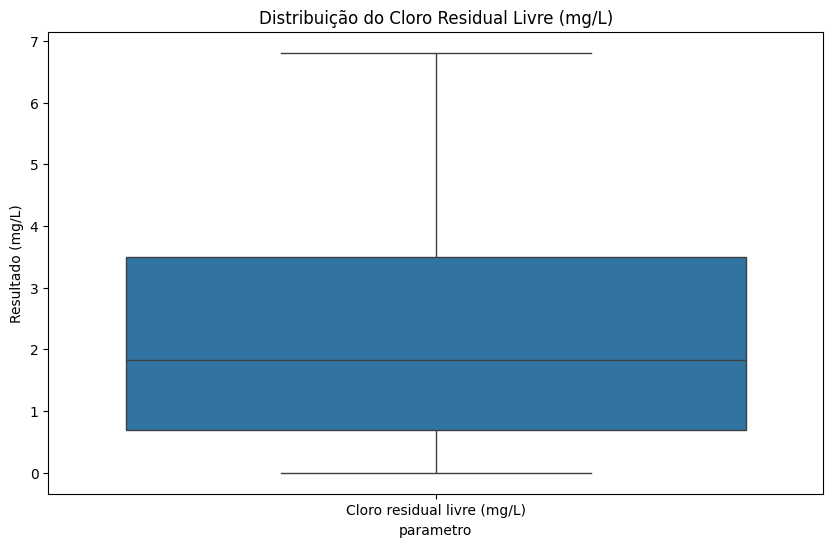

In [116]:
# Boxplot para Cloro Residua Livre
plt.figure(figsize=(10, 6))
sns.boxplot(x='parametro', y='resultado_num', data=df_cloro)
plt.title('Distribuição do Cloro Residual Livre (mg/L)')
plt.ylabel('Resultado (mg/L)')
plt.show()

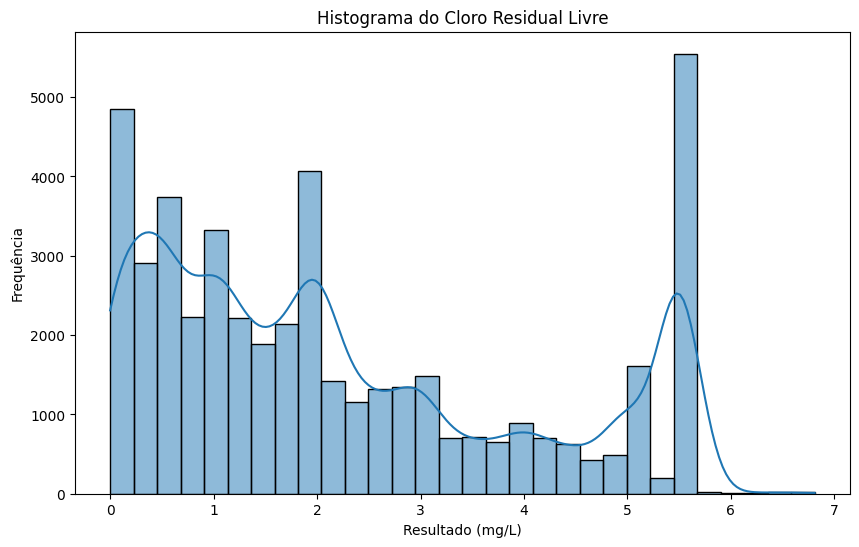

In [117]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cloro['resultado_num'], bins=30, kde=True)
plt.title('Histograma do Cloro Residual Livre')
plt.xlabel('Resultado (mg/L)')
plt.ylabel('Frequência')
plt.show()

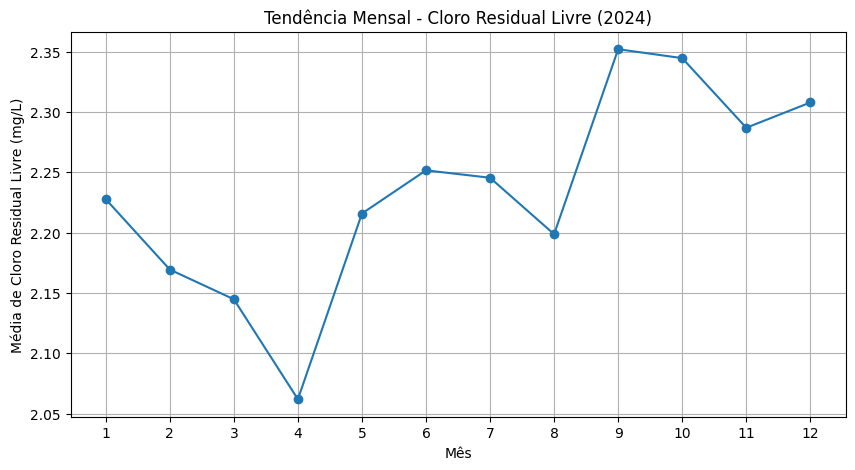

In [118]:
# Agrupar e calcular a média mensal
media_mensal = df_cloro.groupby('mes')['resultado_num'].mean()

# Plotar o gráfico de linha
plt.figure(figsize=(10, 5))
plt.plot(media_mensal.index, media_mensal.values, marker='o')
plt.title('Tendência Mensal - Cloro Residual Livre (2024)')
plt.xlabel('Mês')
plt.ylabel('Média de Cloro Residual Livre (mg/L)')
plt.xticks(range(1, 13))  
plt.grid(True)
plt.show()

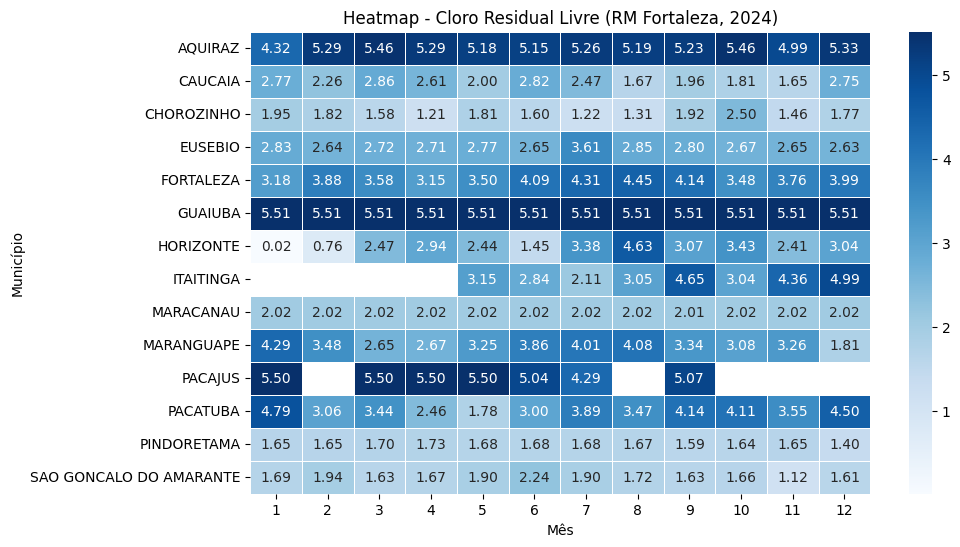

In [119]:
# Municípios da Região Metropolitana de Fortaleza
municipios_rmf = ['FORTALEZA','CAUCAIA','MARACANAU','MARANGUAPE','AQUIRAZ','EUSEBIO','PACATUBA','HORIZONTE','ITAITINGA','GUAIUBA',
    'PINDORETAMA','CHOROZINHO', 'PACAJUS', 'SAO GONCALO DO AMARANTE']

# Filtrar o DataFrame apenas para esses municípios
cloro_rmf_df = df_cloro[df_cloro['municipio'].str.upper().isin(municipios_rmf)]

# Agrupar e pivotar para o heatmap
heatmap_data_rmf = cloro_rmf_df.groupby(['municipio', 'mes'])['resultado_num'].mean().unstack()

# Plotar o heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_rmf, cmap='Blues', linewidths=0.5, annot=True, fmt=".2f")
plt.title('Heatmap - Cloro Residual Livre (RM Fortaleza, 2024)')
plt.xlabel('Mês')
plt.ylabel('Município')
plt.show()


### Analise Exploratória - Parte Três

Vamos agora analisar um parâmetro importantíssimo chamado Turbidez  (VMP Portaria 888/2021 = até 5,0 uT).

A metodologia utilizada para quantificar o paramêtro turbidez é a Nefelometria, e é possível medir utilizando um aparelho conhecido como Turbidimetro, que tem capacidade de quantificação até 800 NTU.

 Vamos analisar os dados com ponto de corte 100 NTU. Já vi turbidez nesse valor após uma descarga de rede, mas que após algumas horas voltou a normalidade.

In [120]:
# Filtrar valores suspeitos para Turbidez >= 100 uT
suspeitos2 = df_saa_2024[
    (df_saa_2024['parametro'] == 'Turbidez (uT)') & 
    (df_saa_2024['resultado_num'] >= 100)]

if not suspeitos2.empty:
    print("\nValores suspeitos (>= 100 uT):")
    display(suspeitos2.head(10)[['municipio', 'data_da_coleta', 'parametro', 'resultado_num']].sort_values(by='resultado_num', ascending=False))
else:
    print("Nenhum valor suspeito (>= 100 uT) encontrado.")


Valores suspeitos (>= 100 uT):


municipio data_da_coleta      parametro  resultado_num
1064956          GRANJEIRO     2024-07-10  Turbidez (uT)          625.0
1064307            MIRAIMA     2024-04-10  Turbidez (uT)          300.0
1031404            MIRAIMA     2024-04-10  Turbidez (uT)          250.0
1055450            MORAUJO     2024-02-27  Turbidez (uT)          229.0
1057075            MORAUJO     2024-02-27  Turbidez (uT)          204.0
1058515            MIRAIMA     2024-04-10  Turbidez (uT)          152.0
1032306            MORAUJO     2024-02-27  Turbidez (uT)          147.0
1079518  SANTANA DO ACARAU     2024-06-25  Turbidez (uT)          134.0
1053232            MIRAIMA     2024-04-10  Turbidez (uT)          130.0
1052871             TURURU     2024-04-10  Turbidez (uT)          103.0

In [121]:
# Criar o DataFrame tratado removendo os suspeitos de 'Turbidez (uT)' >= 100
df_saa_2024_turbidez = df_saa_2024[ ~(
        (df_saa_2024['parametro'] == 'Turbidez (uT)') &
        (df_saa_2024['resultado_num'] >= 100))].copy()

print(f"Base tratada criada com {len(df_saa_2024_turbidez)} registros (antes: {len(df_saa_2024)})")

Base tratada criada com 232522 registros (antes: 232562)


In [122]:
# Filtrar apenas os registros de Turbidez
df_turbidez = df_saa_2024_turbidez[df_saa_2024_turbidez['parametro'].str.contains('Turbidez', case=False, na=False)]

# Verificar se existem dados
if not df_turbidez.empty:
    # Calcular estatísticas
    estatisticas = {
        'Mínimo (mg/L)': df_turbidez['resultado_num'].min(),
        'Máximo (mg/L)': df_turbidez['resultado_num'].max(),
        'Média (mg/L)': df_turbidez['resultado_num'].mean(),
        'Mediana (mg/L)': df_turbidez['resultado_num'].median(),
        'Desvio Padrão': df_turbidez['resultado_num'].std(),
        'Total de Análises': len(df_turbidez)
    }
    
    # Exibir resultados
    print("🔍 Estatísticas da Turbidez:")
    for stat, value in estatisticas.items():
        print(f"{stat}: {value:.2f}" if isinstance(value, (float, int)) else f"{stat}: {value}")
    
    # Análise adicional por mês/ano
    print("\n📅 Tendência Temporal:")
    mensal2 = df_turbidez.groupby(['ano', 'mes'])['resultado_num'].mean().unstack()
    display(mensal2.style.background_gradient(cmap='Blues'))
    
    # Top 5 municípios com maiores valores
    print("\n🏙️ Top 5 Municípios com Maiores Valores:")
    top_municipios2 = df_turbidez.groupby('municipio')['resultado_num'].max().nlargest(5)
    display(top_municipios2)
    
else:
    print("❌ Nenhum registro de Turbidez encontrado.")
    print("Valores únicos de parâmetros:", df_saa_2024_turbidez['parametro'].unique())

🔍 Estatísticas da Turbidez:
Mínimo (mg/L): 0.00
Máximo (mg/L): 99.90
Média (mg/L): 1.57
Mediana (mg/L): 0.70
Desvio Padrão: 4.17
Total de Análises: 44911.00

📅 Tendência Temporal:



🏙️ Top 5 Municípios com Maiores Valores:


municipio
ALCANTARAS     99.9
CANINDE        99.0
RERIUTABA      98.9
IBICUITINGA    94.8
CHOROZINHO     94.6
Name: resultado_num, dtype: float64

In [123]:
# Após todo o tratamento acima, chegando em df_saa_2024_tratado, vamos verificar a presença ou não de outliers, e calcular quartis e limites
Q1 = df_turbidez['resultado_num'].quantile(0.25)
Q3 = df_turbidez['resultado_num'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR

# Mostrar os valores calculados
print(f"Valores calculados:")
print(f"Q1 (25º percentil): {Q1:.2f} uT")
print(f"Q3 (75º percentil): {Q3:.2f} uT")
print(f"IQR (Q3 - Q1): {IQR:.2f} uT")
print(f"Limite superior (Q3 + 1.5*IQR): {limite_superior:.2f} uT\n")

# Identificar outliers
outliers2 = df_turbidez[df_turbidez['resultado_num'] > limite_superior]
print(f"Total de outliers (valores > {limite_superior:.2f} uT): {len(outliers2)}")

# Exibir tabela de outliers (se houver)
if not outliers2.empty:
    display(outliers2[['municipio', 'resultado_num']]
            .sort_values('resultado_num', ascending=False)
            .head(10))  
else:
    print("Nenhum outlier encontrado.")

Valores calculados:
Q1 (25º percentil): 0.40 uT
Q3 (75º percentil): 1.30 uT
IQR (Q3 - Q1): 0.90 uT
Limite superior (Q3 + 1.5*IQR): 2.65 uT

Total de outliers (valores > 2.65 uT): 4829


municipio  resultado_num
1072747             ALCANTARAS           99.9
1117167                CANINDE           99.0
1150638              RERIUTABA           98.9
1205716            IBICUITINGA           94.8
1266727             CHOROZINHO           94.6
1075891                 TURURU           94.0
1039068  SAO JOAO DO JAGUARIBE           93.6
1269258        GENERAL SAMPAIO           90.8
1185101               ITAICABA           89.1
1205595                 TURURU           88.5

count    44911.000000
mean         1.572756
std          4.173347
min          0.000000
25%          0.400000
50%          0.700000
75%          1.300000
max         99.900000
Name: resultado_num, dtype: float64


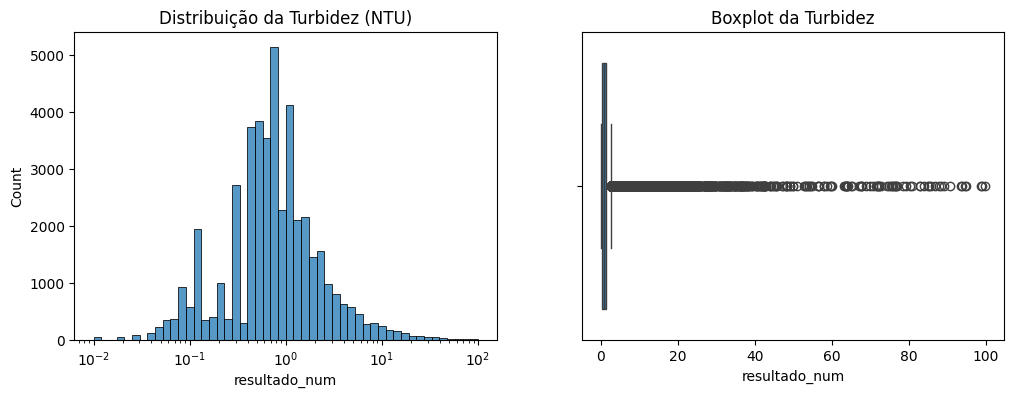

In [124]:
print(df_turbidez['resultado_num'].describe())

# Histograma + boxplot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_turbidez['resultado_num'], bins=50, log_scale=True)  # Escala log se necessário
plt.title("Distribuição da Turbidez (NTU)")

plt.subplot(1, 2, 2)
sns.boxplot(x=df_turbidez['resultado_num'])
plt.title("Boxplot da Turbidez")
plt.show()

In [126]:
# 1) CLASSIFICAÇÃO DOS VALORES
df_turbidez.loc[:, 'classificacao'] = pd.cut(df_turbidez['resultado_num'],bins=[0, 1, 5, 100, np.inf],
                                      labels=['Ótimo (<1 uT)', 'Aceitável (1-5 uT)', 'Alerta (5-100 uT)', 'Erro (>100 uT)'],right=False)

# 2) ANÁLISE POR CATEGORIA
categorias = df_turbidez.groupby('classificacao', observed=True).agg(Contagem=('resultado_num', 'count'),Percentual=('resultado_num', lambda x: f"{len(x)/len(df_turbidez):.1%}"),
                                                                     Máximo=('resultado_num', 'max'))
print(categorias)

                    Contagem Percentual  Máximo
classificacao                                  
Ótimo (<1 uT)          28416      63.3%    0.99
Aceitável (1-5 uT)     14204      31.6%    4.96
Alerta (5-100 uT)       2291       5.1%   99.90


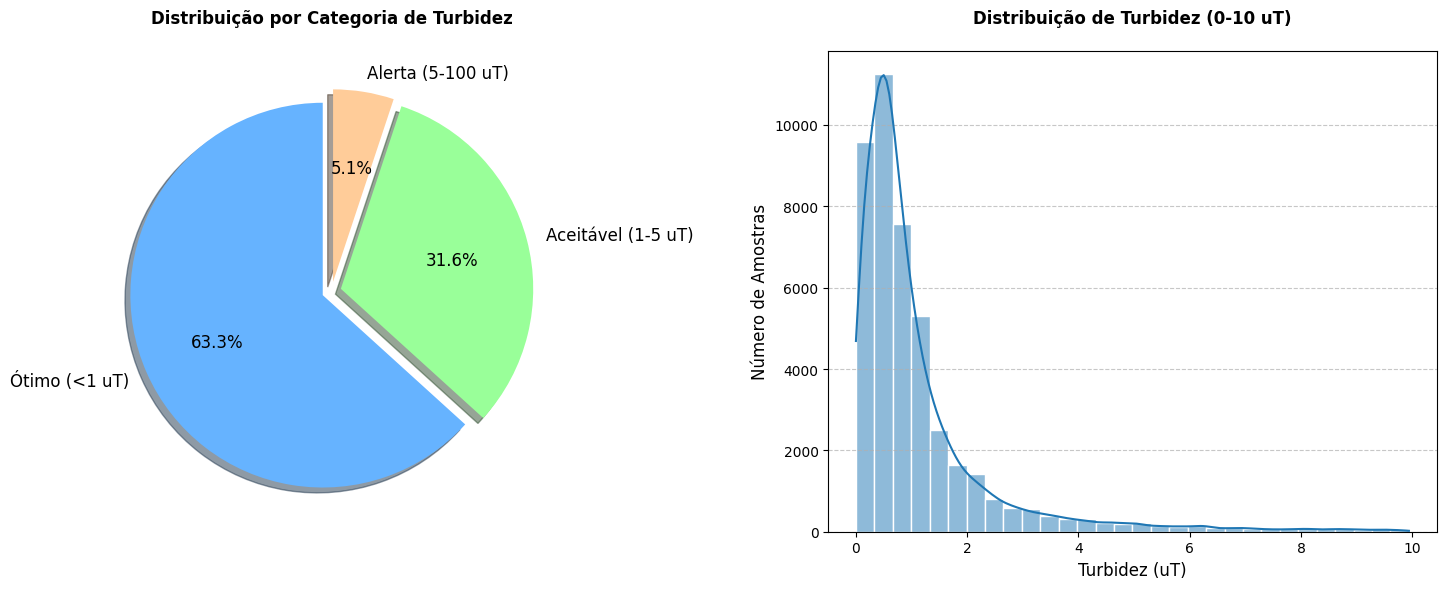

In [127]:
# Configuração do layout
plt.figure(figsize=(15, 6))
plt.subplots_adjust(wspace=0.3)  # Espaço entre os gráficos

# Gráfico 1: Pizza (Distribuição por Categoria)
plt.subplot(1, 2, 1)
categorias['Contagem'].plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#99ff99', '#ffcc99'],
    explode=(0.05, 0.05, 0.05),  # Destaque nas fatias
    shadow=True,
    textprops={'fontsize': 12}
)
plt.title("Distribuição por Categoria de Turbidez", pad=20, fontweight='bold')
plt.ylabel("")  # Remove o label padrão do eixo Y

# Gráfico 2: Histograma (0-10 NTU)
plt.subplot(1, 2, 2)
ax = sns.histplot(
    df_turbidez[df_turbidez['resultado_num'] < 10]['resultado_num'],
    bins=30,
    kde=True,
    color='#1f77b4',
    edgecolor='white'
)
plt.title("Distribuição de Turbidez (0-10 uT)", pad=20, fontweight='bold')
plt.xlabel("Turbidez (uT)", fontsize=12)
plt.ylabel("Número de Amostras", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajuste final
plt.tight_layout()
plt.show()

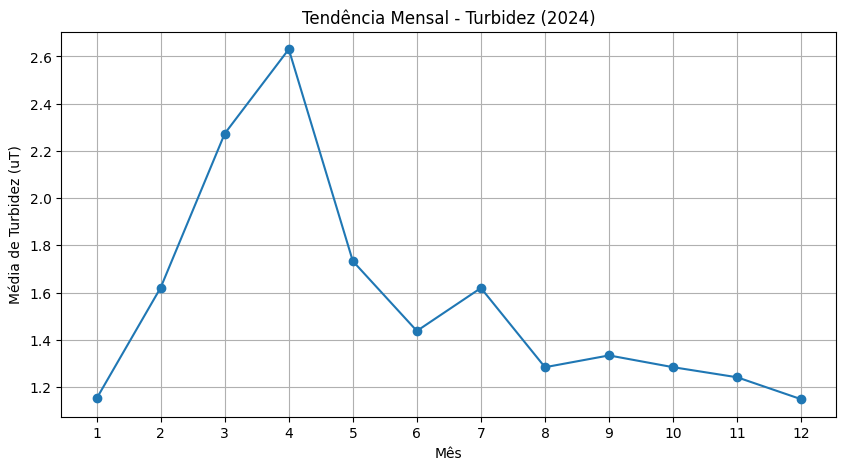

In [128]:
# Agrupar e calcular a média mensal
media_mensal2 = df_turbidez.groupby('mes')['resultado_num'].mean()

# Plotar o gráfico de linha
plt.figure(figsize=(10, 5))
plt.plot(media_mensal2.index, media_mensal2.values, marker='o')
plt.title('Tendência Mensal - Turbidez (2024)')
plt.xlabel('Mês')
plt.ylabel('Média de Turbidez (uT)')
plt.xticks(range(1, 13))  
plt.grid(True)
plt.show()

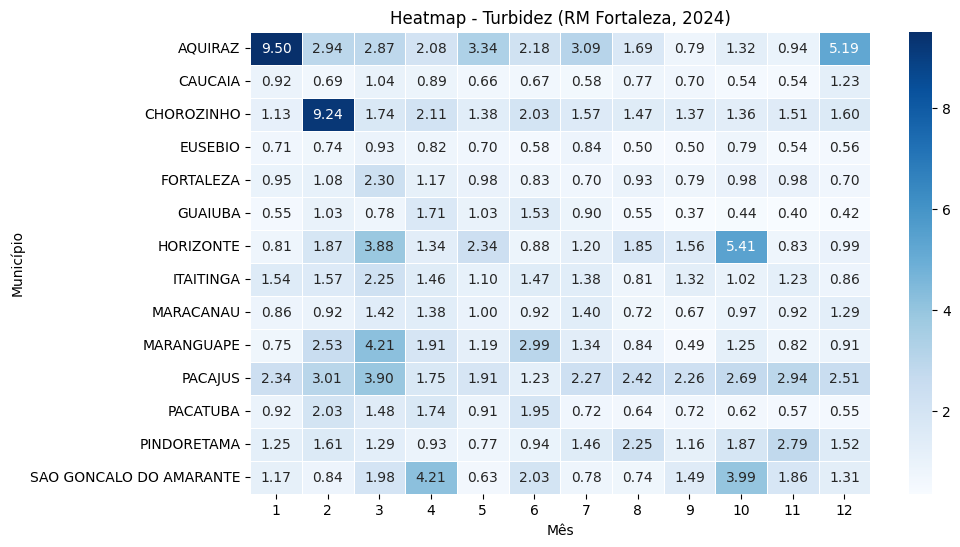

In [129]:
# Filtrar o DataFrame apenas para esses municípios
turbidez_rmf_df = df_turbidez[df_turbidez['municipio'].str.upper().isin(municipios_rmf)]

# Agrupar e pivotar para o heatmap
heatmap_data_rmf2 = turbidez_rmf_df.groupby(['municipio', 'mes'])['resultado_num'].mean().unstack()

# Plotar o heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_rmf2, cmap='Blues', linewidths=0.5, annot=True, fmt=".2f")
plt.title('Heatmap - Turbidez (RM Fortaleza, 2024)')
plt.xlabel('Mês')
plt.ylabel('Município')
plt.show()

In [130]:
# Verificar proporção dentro do padrão
dentro_padrao = df_turbidez[df_turbidez['resultado_num'] <= 5]
print(f"Percentual dentro do padrão (≤5 NTU): {len(dentro_padrao)/len(df_turbidez):.1%}")

Percentual dentro do padrão (≤5 NTU): 95.1%


In [131]:
# Correção: usar len(df_turbidez) como denominador
percentual_correto = len(dentro_padrao)/len(df_turbidez)
print(f"Percentual dentro do padrão (≤5 NTU) [CORRETO]: {percentual_correto:.1%}")

Percentual dentro do padrão (≤5 NTU) [CORRETO]: 95.1%


### Analise Exploratória - Parte Quatro

Vamos agora analisar o parâmetro Cor  (VMP Portaria 888/2021 = até 15,0 uH).

A metodologia utilizada para quantificar o paramêtro cor aparente é a comparação visual, e é possível medir utilizando tubos múltiplos com padrões diluidos a partir do hexacloroplatinato cobaltoso, que tem capacidade de quantificação até 300 uH.

Os valores para este parametro

In [133]:
# Filtrar valores suspeitos (exemplo: > 30 uH)
suspeitos3 = df_saa_2024[
    (df_saa_2024['parametro'] == 'Cor Aparente (uH)') & 
    (df_saa_2024['resultado_num'] > 30)]

if not suspeitos3.empty:
    print("\nValores suspeitos (>= 30 uH):")
    display(suspeitos3.head(5)[['municipio', 'data_da_coleta', 'parametro', 'resultado_num']].sort_values(by='resultado_num', ascending=False))
else:
    print("Nenhum valor suspeito (> 30 uH) encontrado.")


Valores suspeitos (>= 30 uH):


municipio data_da_coleta          parametro  resultado_num
1029923    MIRAIMA     2024-03-13  Cor Aparente (uH)           70.0
1029971  HORIZONTE     2024-10-22  Cor Aparente (uH)           70.0
1030045   GROAIRAS     2024-06-24  Cor Aparente (uH)           70.0
1029809     GRANJA     2024-02-20  Cor Aparente (uH)           40.0
1030277   AMONTADA     2024-06-03  Cor Aparente (uH)           40.0

In [134]:
# Criar o DataFrame tratado removendo os suspeitos de 'Cor Aparente (uH)' >= 30 uH
df_saa_2024_cor = df_saa_2024[ ~(
        (df_saa_2024['parametro'] == 'Cor Aparente (uH)') &
        (df_saa_2024['resultado_num'] > 30))].copy()

print(f"Base tratada criada com {len(df_saa_2024_cor)} registros (antes: {len(df_saa_2024_cor)})")

Base tratada criada com 231122 registros (antes: 231122)


In [52]:
# Filtrar apenas os registros de Cor Aparente
df_cor = df_saa_2024_cor[df_saa_2024_cor['parametro'].str.contains('Cor', case=False, na=False)]

# Verificar se existem dados
if not df_cor.empty:
    # Calcular estatísticas
    estatisticas = {
        'Mínimo (mg/L)': df_cor['resultado_num'].min(),
        'Máximo (mg/L)': df_cor['resultado_num'].max(),
        'Média (mg/L)': df_cor['resultado_num'].mean(),
        'Mediana (mg/L)': df_cor['resultado_num'].median(),
        'Desvio Padrão': df_cor['resultado_num'].std(),
        'Total de Análises': len(df_cor)
    }
    
    # Exibir resultados
    print("🔍 Estatísticas da Cor:")
    for stat, value in estatisticas.items():
        print(f"{stat}: {value:.2f}" if isinstance(value, (float, int)) else f"{stat}: {value}")
    
    # Análise adicional por mês/ano
    print("\n📅 Tendência Temporal:")
    mensal3 = df_cor.groupby(['ano', 'mes'])['resultado_num'].mean().unstack()
    display(mensal3.style.background_gradient(cmap='Blues'))
    
    # Top 5 municípios com maiores valores
    print("\n🏙️ Top 5 Municípios com Maiores Valores:")
    top_municipios3 = df_cor.groupby('municipio')['resultado_num'].max().nlargest(5)
    display(top_municipios3)
    
else:
    print("❌ Nenhum registro de Turbidez encontrado.")
    print("Valores únicos de parâmetros:", df_saa_2024['parametro'].unique())

🔍 Estatísticas da Cor:
Mínimo (mg/L): 0.00
Máximo (mg/L): 30.00
Média (mg/L): 7.96
Mediana (mg/L): 5.00
Desvio Padrão: 5.72
Total de Análises: 29256.00

📅 Tendência Temporal:



🏙️ Top 5 Municípios com Maiores Valores:


municipio
ACARAPE       30.0
ALCANTARAS    30.0
AMONTADA      30.0
APUIARES      30.0
AQUIRAZ       30.0
Name: resultado_num, dtype: float64

In [53]:
# Após todo o tratamento acima, chegando em df_cor, vamos verificar a presença ou não de outliers, e calcular quartis e limites
Q1 = df_cor['resultado_num'].quantile(0.25)
Q3 = df_cor['resultado_num'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR

# Mostrar os valores calculados
print(f"Valores calculados:")
print(f"Q1 (25º percentil): {Q1:.2f} uH")
print(f"Q3 (75º percentil): {Q3:.2f} uH")
print(f"IQR (Q3 - Q1): {IQR:.2f} uH")
print(f"Limite superior (Q3 + 1.5*IQR): {limite_superior:.2f} uH\n")

# Identificar outliers
outliers3 = df_cor[df_cor['resultado_num'] > limite_superior]
print(f"Total de outliers (valores > {limite_superior:.2f} uH): {len(outliers3)}")

# Exibir tabela de outliers (se houver)
if not outliers3.empty:
    display(outliers3[['municipio', 'resultado_num']]
            .sort_values('resultado_num', ascending=False)
            .head(10))  
else:
    print("Nenhum outlier encontrado.")

Valores calculados:
Q1 (25º percentil): 5.00 uH
Q3 (75º percentil): 10.00 uH
IQR (Q3 - Q1): 5.00 uH
Limite superior (Q3 + 1.5*IQR): 17.50 uH

Total de outliers (valores > 17.50 uH): 2185


municipio  resultado_num
1196020           REDENCAO           30.0
1245177  LIMOEIRO DO NORTE           30.0
1171347           REDENCAO           30.0
1170652            ITAPAGE           30.0
1246198           PARACURU           30.0
1170649            ITAPAGE           30.0
1170641            ITAPAGE           30.0
1110733            QUIXADA           30.0
1110776            MIRAIMA           30.0
1170623            ITAPAGE           30.0

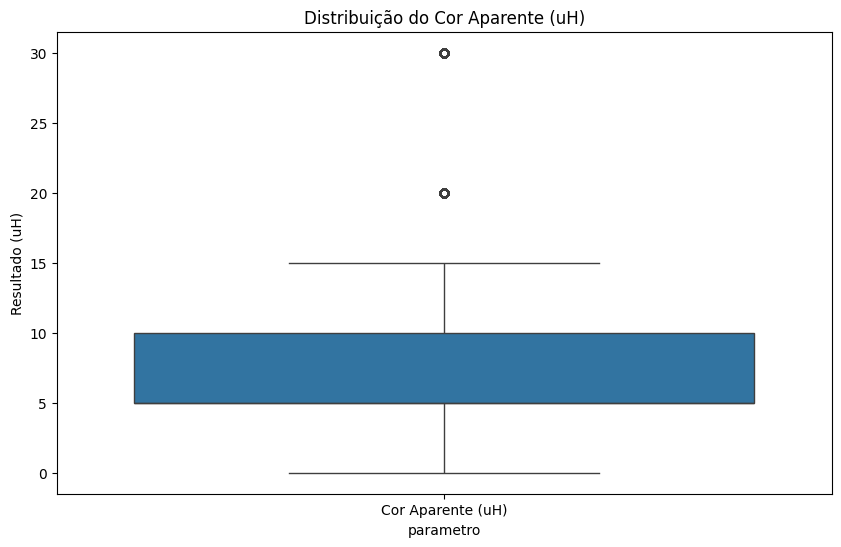

In [54]:
# Boxplot para Cor Aparente
plt.figure(figsize=(10, 6))
sns.boxplot(x='parametro', y='resultado_num', data=df_cor)
plt.title('Distribuição do Cor Aparente (uH)')
plt.ylabel('Resultado (uH)')
plt.show()

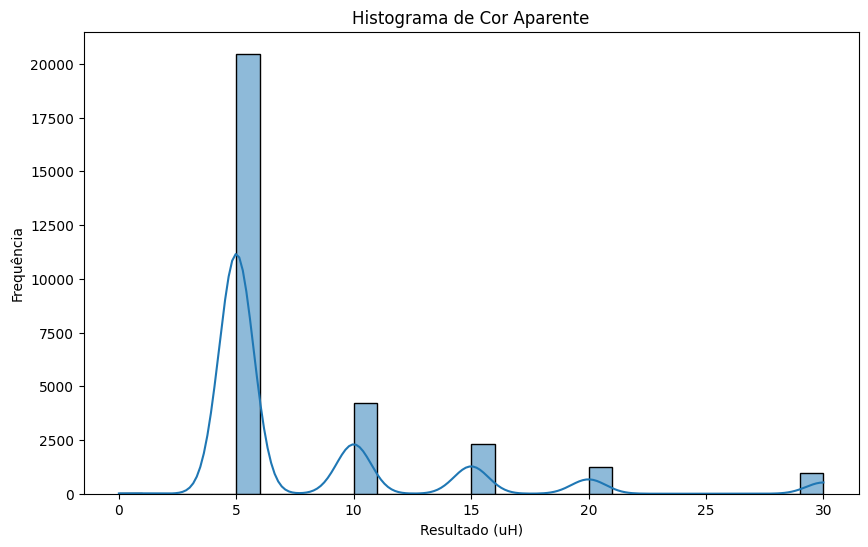

In [55]:
# Histograma para Cor Aparente
plt.figure(figsize=(10, 6))
sns.histplot(df_cor['resultado_num'], bins=30, kde=True)
plt.title('Histograma de Cor Aparente')
plt.xlabel('Resultado (uH)')
plt.ylabel('Frequência')
plt.show()

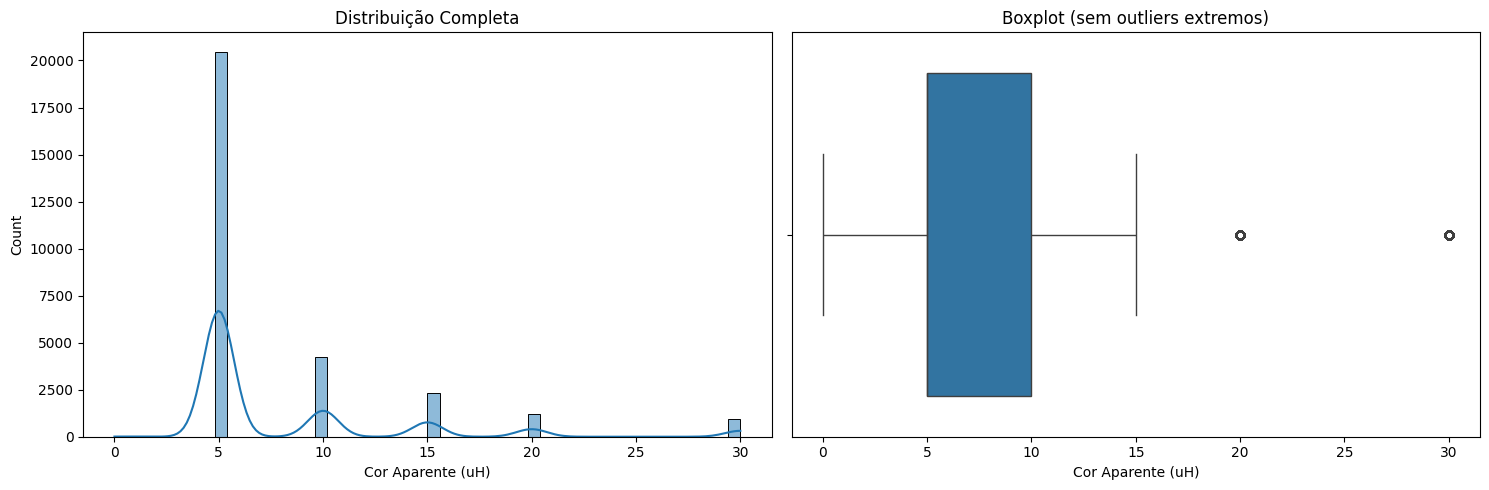

In [56]:
plt.figure(figsize=(15, 5))

# Histograma com zoom na faixa principal
plt.subplot(1, 2, 1)
sns.histplot(df_cor['resultado_num'], bins=50, kde=True)
plt.title("Distribuição Completa")
plt.xlabel("Cor Aparente (uH)")

# Boxplot sem outliers extremos
plt.subplot(1, 2, 2)
sns.boxplot(x=df_cor['resultado_num'], showfliers=True)
plt.title("Boxplot (sem outliers extremos)")
plt.xlabel("Cor Aparente (uH)")

plt.tight_layout()
plt.show()

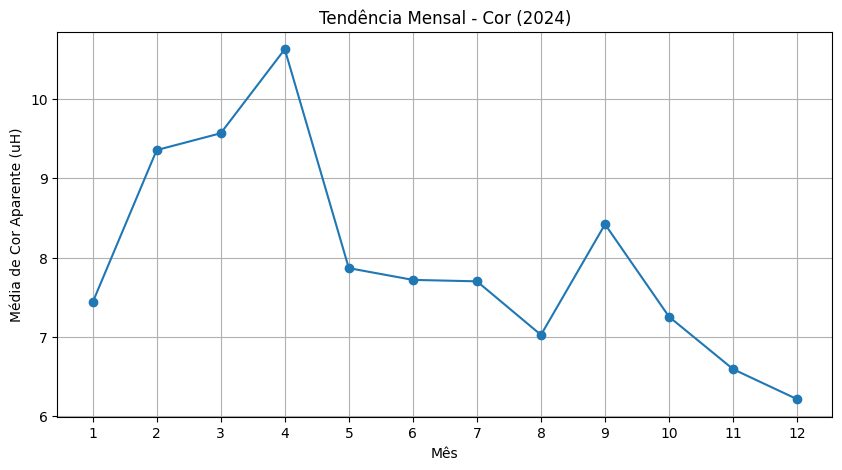

In [57]:
# Agrupar e calcular a média mensal
media_mensal3 = df_cor.groupby('mes')['resultado_num'].mean()

# Plotar o gráfico de linha
plt.figure(figsize=(10, 5))
plt.plot(media_mensal3.index, media_mensal3.values, marker='o')
plt.title('Tendência Mensal - Cor (2024)')
plt.xlabel('Mês')
plt.ylabel('Média de Cor Aparente (uH)')
plt.xticks(range(1, 13))  
plt.grid(True)
plt.show()

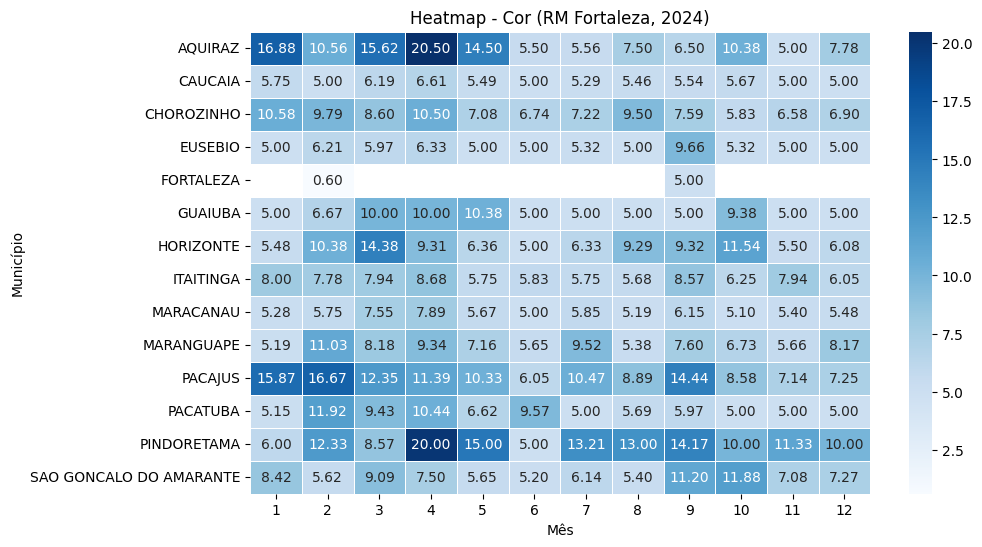

In [58]:
# Filtrar o DataFrame apenas para esses municípios
cor_rmf_df = df_cor[df_cor['municipio'].str.upper().isin(municipios_rmf)]

# Agrupar e pivotar para o heatmap
heatmap_data_rmf3 = cor_rmf_df.groupby(['municipio', 'mes'])['resultado_num'].mean().unstack()

# Plotar o heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_rmf3, cmap='Blues', linewidths=0.5, annot=True, fmt=".2f")
plt.title('Heatmap - Cor (RM Fortaleza, 2024)')
plt.xlabel('Mês')
plt.ylabel('Município')
plt.show()

### Analise Exploratória - Parte 5

In [145]:
# Filtrar valores suspeitos (exemplo: < 4 mg/L)
suspeitos4 = df_saa_2024[
    (df_saa_2024['parametro'] == 'pH') & 
    (df_saa_2024['resultado_num'] <= 4)]

if not suspeitos4.empty:
    print("\nValores suspeitos (< 4 upH):")
    display(suspeitos4[['municipio', 'data_da_coleta', 'parametro', 'resultado_num']].sort_values(by='resultado_num', ascending=False))
else:
    print("✅ Nenhum valor suspeito (< 4 upH) encontrado.")


Valores suspeitos (< 4 upH):


municipio data_da_coleta parametro  resultado_num
1222084          PENTECOSTE     2024-04-08        pH           4.00
1254402  TABULEIRO DO NORTE     2024-05-14        pH           1.69
1111112         NOVA OLINDA     2024-11-12        pH           1.00
1204447         PINDORETAMA     2024-03-21        pH           1.00
1065149            IRAUCUBA     2024-08-26        pH           0.95
1081736            ACOPIARA     2024-03-11        pH           0.71
1207427        CAMPOS SALES     2024-05-15        pH           0.70
1214898           CARNAUBAL     2024-08-20        pH           0.50
1220344            IRAUCUBA     2024-08-26        pH           0.32
1220351            IRAUCUBA     2024-08-26        pH           0.31
1238082        CAMPOS SALES     2024-05-15        pH           0.25
1269018            IRAUCUBA     2024-08-26        pH           0.16
1178018             ARARIPE     2024-04-22        pH           0.00
1109676           HORIZONTE     2024-07-24        pH           0.00
1079803          POTIRETAMA     2024-04-22        pH           0.00
1245625            PACATUBA     2024-08-05        pH           0.00
1071655      SENADOR POMPEU     2024-03-06        pH           0.00
1047010           HORIZONTE     2024-02-21        pH           0.00

In [140]:
# Criar o DataFrame tratado removendo os suspeitos de 'Cor Aparente (uH)' >= 30 uH
df_saa_2024_ph = df_saa_2024[ ~(
        (df_saa_2024['parametro'] == 'pH') &
        (df_saa_2024['resultado_num'] <= 4))].copy()

print(f"Base tratada criada com {len(df_saa_2024_ph)} registros (antes: {len(df_saa_2024_ph)})")

Base tratada criada com 232544 registros (antes: 232544)


In [141]:
# Filtrar apenas os registros de Cor Aparente
df_ph = df_saa_2024_ph[df_saa_2024_ph['parametro'].str.contains('ph', case=False, na=False)]

# Verificar se existem dados
if not df_ph.empty:
    # Calcular estatísticas
    estatisticas = {
        'Mínimo (upH)': df_ph['resultado_num'].min(),
        'Máximo (upH)': df_ph['resultado_num'].max(),
        'Média (upH)': df_ph['resultado_num'].mean(),
        'Mediana (upH)': df_ph['resultado_num'].median(),
        'Desvio Padrão': df_ph['resultado_num'].std(),
        'Total de Análises': len(df_ph)
    }
    
    # Exibir resultados
    print("🔍 Estatísticas da Cor:")
    for stat, value in estatisticas.items():
        print(f"{stat}: {value:.2f}" if isinstance(value, (float, int)) else f"{stat}: {value}")
    
    # Análise adicional por mês/ano
    print("\n📅 Tendência Temporal:")
    mensal4 = df_ph.groupby(['ano', 'mes'])['resultado_num'].mean().unstack()
    display(mensal4.style.background_gradient(cmap='Blues'))
    
    # Top 5 municípios com maiores valores
    print("\n🏙️ Top 5 Municípios com Maiores Valores:")
    top_municipios4 = df_ph.groupby('municipio')['resultado_num'].max().nlargest(5)
    display(top_municipios4)
    
else:
    print("❌ Nenhum registro de Turbidez encontrado.")
    print("Valores únicos de parâmetros:", df_saa_2024['parametro'].unique())

🔍 Estatísticas da Cor:
Mínimo (upH): 5.00
Máximo (upH): 8.40
Média (upH): 6.88
Mediana (upH): 7.00
Desvio Padrão: 0.65
Total de Análises: 7570.00

📅 Tendência Temporal:



🏙️ Top 5 Municípios com Maiores Valores:


municipio
ACOPIARA        8.4
RUSSAS          8.4
BANABUIU        8.2
CAMPOS SALES    8.2
SOLONOPOLE      8.0
Name: resultado_num, dtype: float64

In [142]:
# Após todo o tratamento acima, chegando em df_cor, vamos verificar a presença ou não de outliers, e calcular quartis e limites
Q1 = df_ph['resultado_num'].quantile(0.25)
Q3 = df_ph['resultado_num'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q3 - 1.5 * IQR

# Mostrar os valores calculados
print(f"Valores calculados:")
print(f"Q1 (25º percentil): {Q1:.2f} upH")
print(f"Q3 (75º percentil): {Q3:.2f} upH")
print(f"IQR (Q3 - Q1): {IQR:.2f} upH")
print(f"Limite superior (Q3 + 1.5*IQR): {limite_superior:.2f} upH\n")
print(f"Limite inferior (Q3 - 1.5*IQR): {limite_inferior:.2f} upH\n")

# Identificar outliers
outliers4 = df_ph[df_ph['resultado_num'] > limite_superior]
print(f"Total de outliers (valores > {limite_superior:.2f} uH): {len(outliers4)}")

# Exibir tabela de outliers (se houver)
if not outliers4.empty:
    display(outliers4[['municipio', 'resultado_num']]
            .sort_values('resultado_num', ascending=False)
            .head(10))  
else:
    print("Nenhum outlier encontrado.")

Valores calculados:
Q1 (25º percentil): 6.12 upH
Q3 (75º percentil): 7.20 upH
IQR (Q3 - Q1): 1.08 upH
Limite superior (Q3 + 1.5*IQR): 8.82 upH

Limite inferior (Q3 - 1.5*IQR): 5.58 upH

Total de outliers (valores > 8.82 uH): 0
Nenhum outlier encontrado.


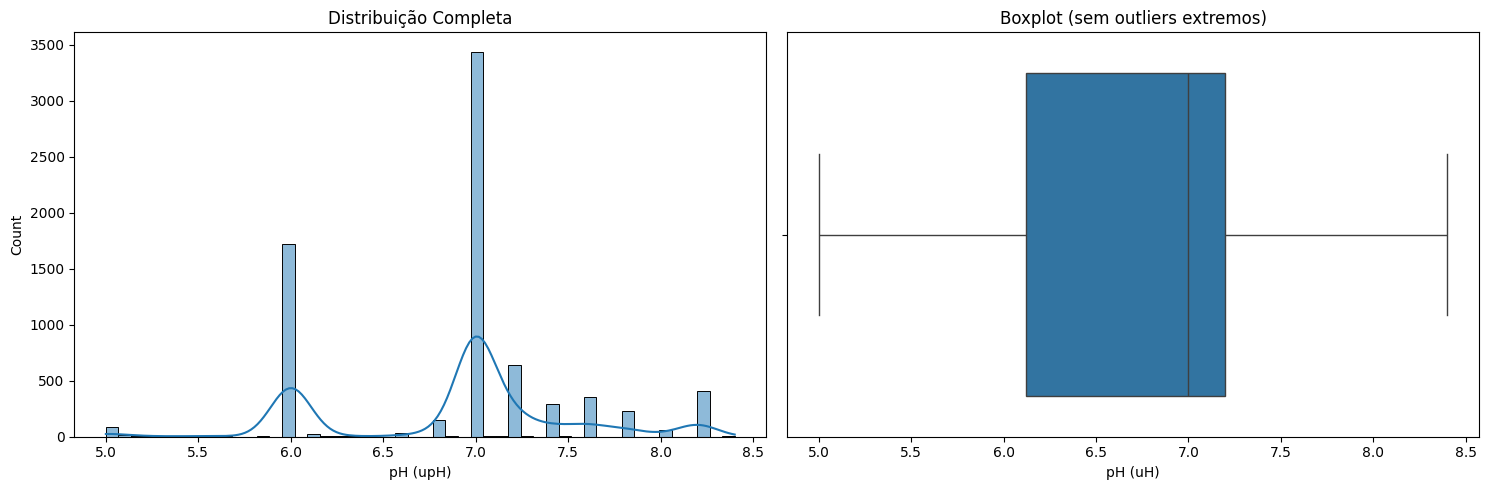

In [143]:
plt.figure(figsize=(15, 5))

# Histograma com zoom na faixa principal
plt.subplot(1, 2, 1)
sns.histplot(df_ph['resultado_num'], bins=50, kde=True)
plt.title("Distribuição Completa")
plt.xlabel("pH (upH)")

# Boxplot sem outliers extremos
plt.subplot(1, 2, 2)
sns.boxplot(x=df_ph['resultado_num'], showfliers=True)
plt.title("Boxplot (sem outliers extremos)")
plt.xlabel("pH (uH)")

plt.tight_layout()
plt.show()

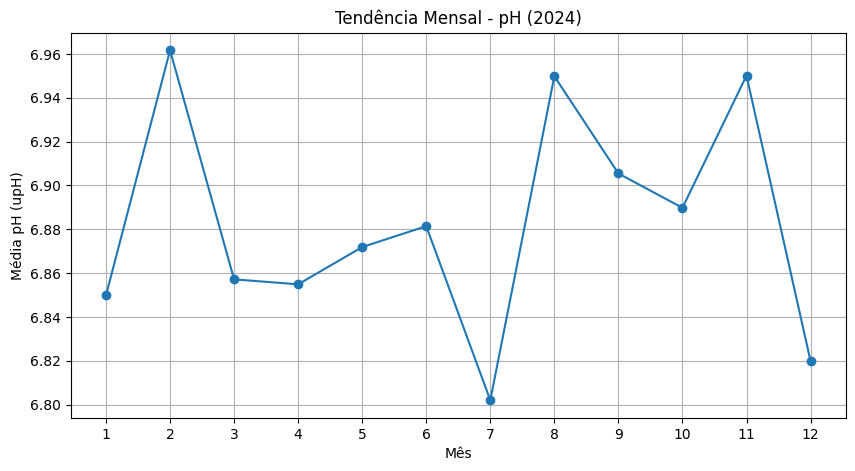

In [146]:
# Agrupar e calcular a média mensal
media_mensal4 = df_ph.groupby('mes')['resultado_num'].mean()

# Plotar o gráfico de linha
plt.figure(figsize=(10, 5))
plt.plot(media_mensal4.index, media_mensal4.values, marker='o')
plt.title('Tendência Mensal - pH (2024)')
plt.xlabel('Mês')
plt.ylabel('Média pH (upH)')
plt.xticks(range(1, 13))  
plt.grid(True)
plt.show()

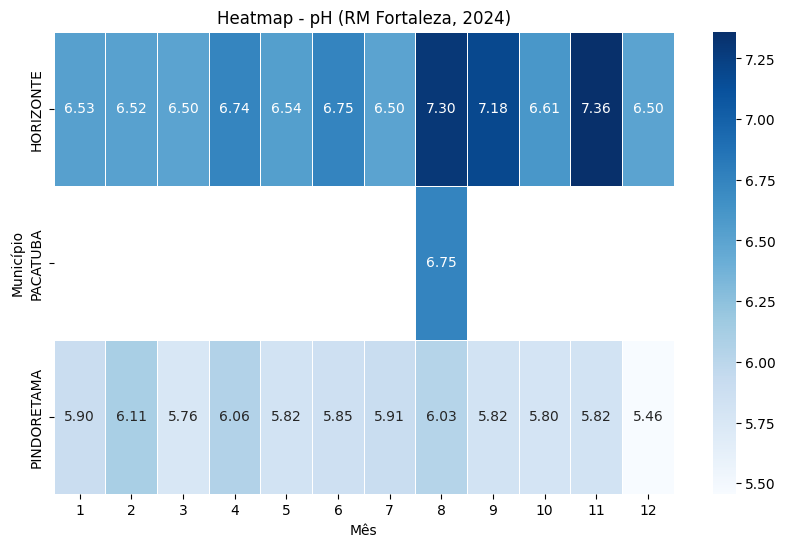

In [147]:
# Filtrar o DataFrame apenas para esses municípios
ph_rmf_df = df_ph[df_ph['municipio'].str.upper().isin(municipios_rmf)]

# Agrupar e pivotar para o heatmap
heatmap_data_rmf4 = ph_rmf_df.groupby(['municipio', 'mes'])['resultado_num'].mean().unstack()

# Plotar o heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_rmf4, cmap='Blues', linewidths=0.5, annot=True, fmt=".2f")
plt.title('Heatmap - pH (RM Fortaleza, 2024)')
plt.xlabel('Mês')
plt.ylabel('Município')
plt.show()

## MicroBiologia

In [88]:
df_saa_2024[(df_saa_2024['parametro'] == 'Escherichia coli') | 
            (df_saa_2024['parametro'] == 'Coliformes totais')]['parametro'].value_counts()

parametro
Escherichia coli     44744
Coliformes totais    44595
Name: count, dtype: int64

In [89]:
df_saa_2024.columns

Index(['regiao_geografica', 'uf', 'regional_de_saude', 'municipio',
       'numero_da_amostra', 'motivo_da_coleta',
       'tipo_da_forma_de_abastecimento', 'nome_da_forma_de_abastecimento',
       'ano', 'mes', 'data_da_coleta', 'data_de_registro_no_sisagua',
       'procedencia_da_coleta', 'descricao_do_local', 'parametro', 'resultado',
       'resultado_num', 'conformidade', 'tipo_analise'],
      dtype='object')

In [90]:
# Filtrar apenas os parâmetros microbiológicos
df_micro = df_saa_2024[(df_saa_2024['parametro'].isin(['Escherichia coli', 'Coliformes totais']))].copy()

# Verificar estrutura
print(df_micro.info())
print("\nDistribuição dos parâmetros:")
print(df_micro['parametro'].value_counts())

# Converter para categórico para melhor performance
df_micro['conformidade'] = df_micro['conformidade'].astype('category')
df_micro['parametro'] = df_micro['parametro'].astype('category')

<class 'pandas.core.frame.DataFrame'>
Index: 89339 entries, 1029744 to 1284529
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   regiao_geografica               89339 non-null  object        
 1   uf                              89339 non-null  object        
 2   regional_de_saude               89339 non-null  object        
 3   municipio                       89339 non-null  object        
 4   numero_da_amostra               89339 non-null  object        
 5   motivo_da_coleta                89339 non-null  object        
 6   tipo_da_forma_de_abastecimento  89339 non-null  object        
 7   nome_da_forma_de_abastecimento  89339 non-null  object        
 8   ano                             89339 non-null  int64         
 9   mes                             89339 non-null  int64         
 10  data_da_coleta                  89339 non-null  datetime64[ns]
 11 

Porcentagem de conformidade por parâmetro:
conformidade        CONFORME  NÃO CONFORME
parametro                                 
Coliformes totais  71.460926     28.539074
Escherichia coli   92.204541      7.795459


<Figure size 1000x600 with 0 Axes>

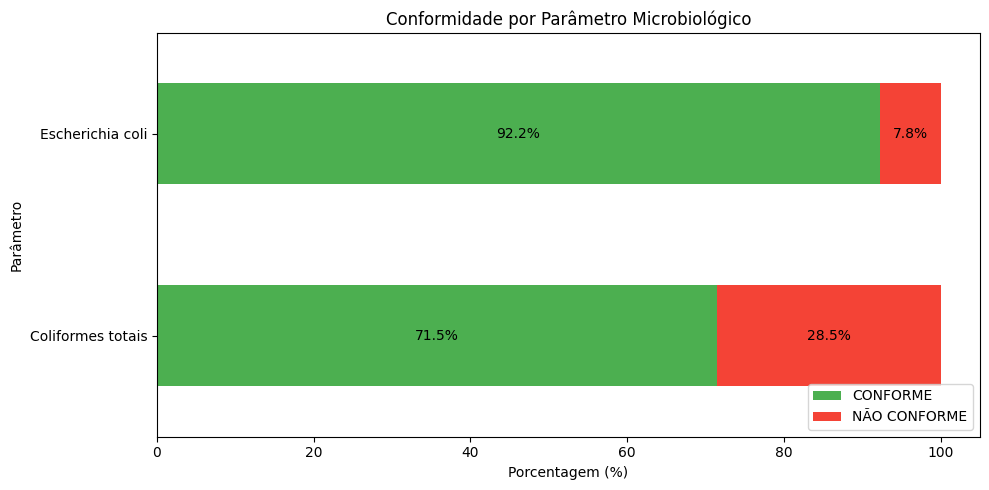

In [149]:
plt.figure(figsize=(10, 6))
# Análise de conformidade por parâmetro
conformidade_por_parametro = pd.crosstab(
    df_micro['parametro'],
    df_micro['conformidade'],
    normalize='index'
) * 100

print("Porcentagem de conformidade por parâmetro:")
print(conformidade_por_parametro)

# Gráfico de conformidade
ax = conformidade_por_parametro.plot(
    kind='barh',
    stacked=True,
    color=['#4CAF50', '#F44336'],  # Verde para CONFORME, Vermelho para NÃO CONFORME
    figsize=(10, 5)
)
plt.title('Conformidade por Parâmetro Microbiológico')
plt.xlabel('Porcentagem (%)')
plt.ylabel('Parâmetro')
for c in ax.containers:
    ax.bar_label(c, fmt='%.1f%%', label_type='center')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [ ]:
# Agrupar por mês e parâmetro
mensal = df_micro.groupby([
    'mes',
    'parametro',
    'conformidade'
]).size().unstack().fillna(0)

# Calcular porcentagem de não conformidade
for param in ['Escherichia coli', 'Coliformes totais']:
    mensal[f'{param}_%_não_conforme'] = (mensal.loc[param, 'NÃO CONFORME'] / 
                                        (mensal.loc[param, 'CONFORME'] + mensal.loc[param, 'NÃO CONFORME'])) * 100

# Plotar tendência mensal
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=mensal.reset_index(),
    x='mes',
    y='Escherichia coli_%_não_conforme',
    label='E. coli',
    marker='o'
)
sns.lineplot(
    data=mensal.reset_index(),
    x='mes',
    y='Coliformes totais_%_não_conforme',
    label='Coliformes Totais',
    marker='o'
)
plt.title('Variação Mensal da Não Conformidade Microbiológica (2024)')
plt.xlabel('Mês')
plt.ylabel('Porcentagem de Não Conformidade (%)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend()
plt.show()

C:\Users\Max Moreira\AppData\Local\Temp\ipykernel_18496\3190632101.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mensal = df_micro.groupby([


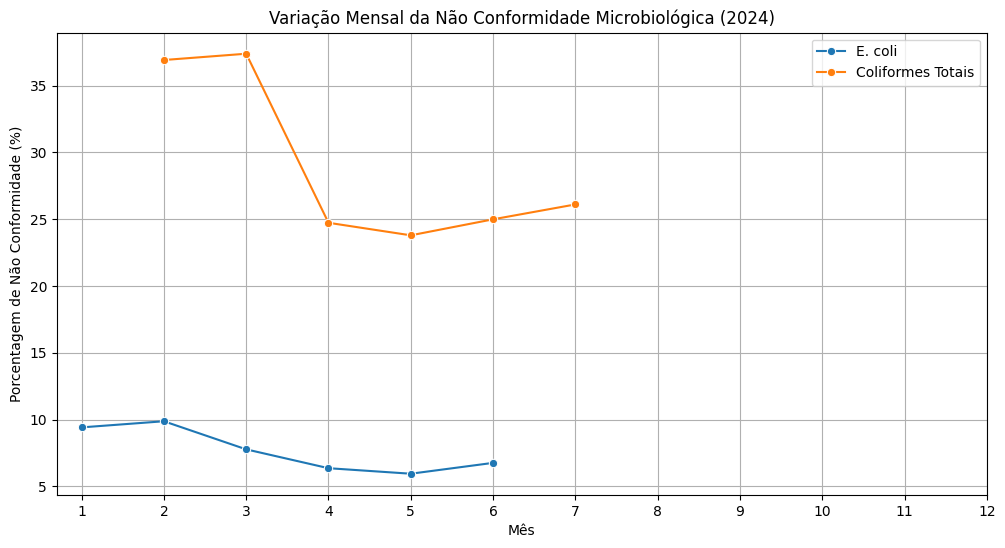

In [93]:
# Agrupar por mês, parâmetro e conformidade
mensal = df_micro.groupby([
    'mes',
    'parametro',
    'conformidade'
]).size().unstack(fill_value=0)

# Criar DataFrame para armazenar resultados finais
resultado_mensal = mensal.reset_index()

# Inicializar colunas de porcentagem
for param in ['Escherichia coli', 'Coliformes totais']:
    # Filtrar apenas o parâmetro específico
    param_data = mensal.xs(param, level='parametro')
    
    # Calcular porcentagem de não conformidade mês a mês
    resultado_mensal.loc[resultado_mensal['parametro'] == param, f'{param}_%_não_conforme'] = (
        param_data['NÃO CONFORME'] / (param_data['CONFORME'] + param_data['NÃO CONFORME'])
    ) * 100

# Plotar tendência mensal
plt.figure(figsize=(12, 6))

# Plot para Escherichia coli
sns.lineplot(
    data=resultado_mensal[resultado_mensal['parametro'] == 'Escherichia coli'],
    x='mes',
    y='Escherichia coli_%_não_conforme',
    label='E. coli',
    marker='o'
)

# Plot para Coliformes totais
sns.lineplot(
    data=resultado_mensal[resultado_mensal['parametro'] == 'Coliformes totais'],
    x='mes',
    y='Coliformes totais_%_não_conforme',
    label='Coliformes Totais',
    marker='o'
)

plt.title('Variação Mensal da Não Conformidade Microbiológica (2024)')
plt.xlabel('Mês')
plt.ylabel('Porcentagem de Não Conformidade (%)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend()
plt.show()


C:\Users\Max Moreira\AppData\Local\Temp\ipykernel_18496\1882257720.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_municipios5 = df_micro.groupby([


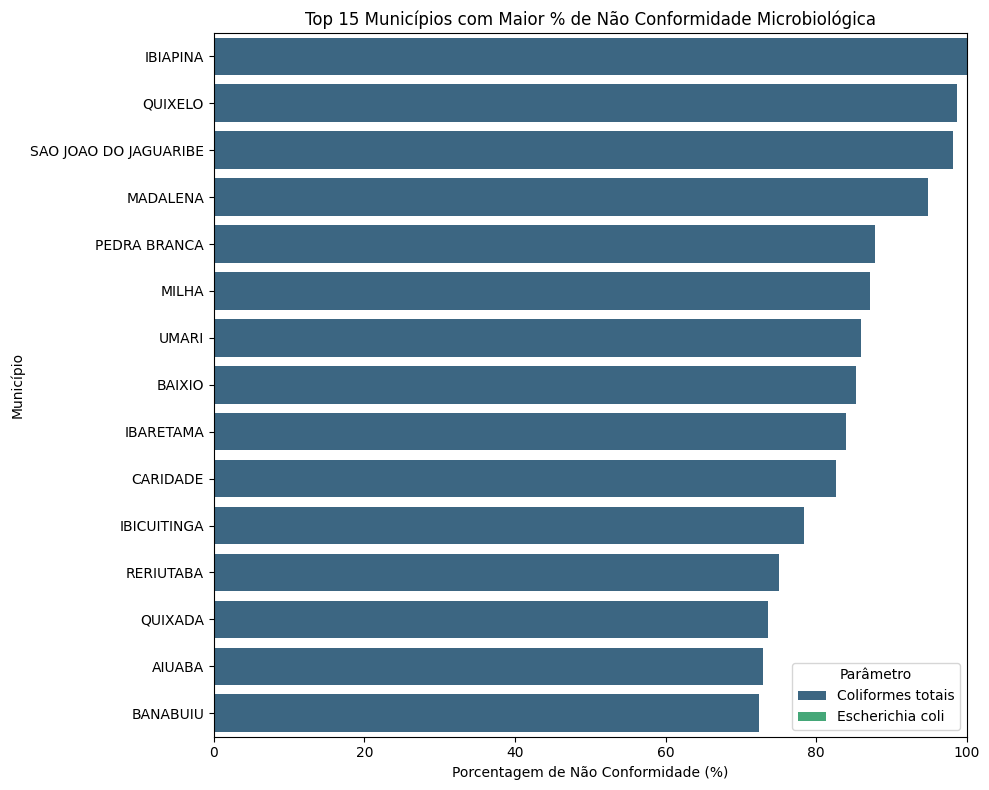

In [94]:
# Top 15 municípios com maior não conformidade
top_municipios5 = df_micro.groupby([
    'municipio',
    'parametro',
    'conformidade'
]).size().unstack().fillna(0)

# Calcular % não conforme
top_municipios5['%_não_conforme'] = (top_municipios5['NÃO CONFORME'] / 
                                   (top_municipios5['CONFORME'] + top_municipios5['NÃO CONFORME'])) * 100

# Ordenar e pegar top 15
top_15 = top_municipios5.sort_values('%_não_conforme', ascending=False).head(15)

# Plotar
plt.figure(figsize=(10, 8))
sns.barplot(
    y=top_15.index.get_level_values('municipio'),
    x=top_15['%_não_conforme'],
    hue=top_15.index.get_level_values('parametro'),
    palette='viridis'
)
plt.title('Top 15 Municípios com Maior % de Não Conformidade Microbiológica')
plt.xlabel('Porcentagem de Não Conformidade (%)')
plt.ylabel('Município')
plt.xlim(0, 100)
plt.legend(title='Parâmetro')
plt.tight_layout()
plt.show()

C:\Users\Max Moreira\AppData\Local\Temp\ipykernel_18496\3231560630.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  por_regional = df_micro.groupby([


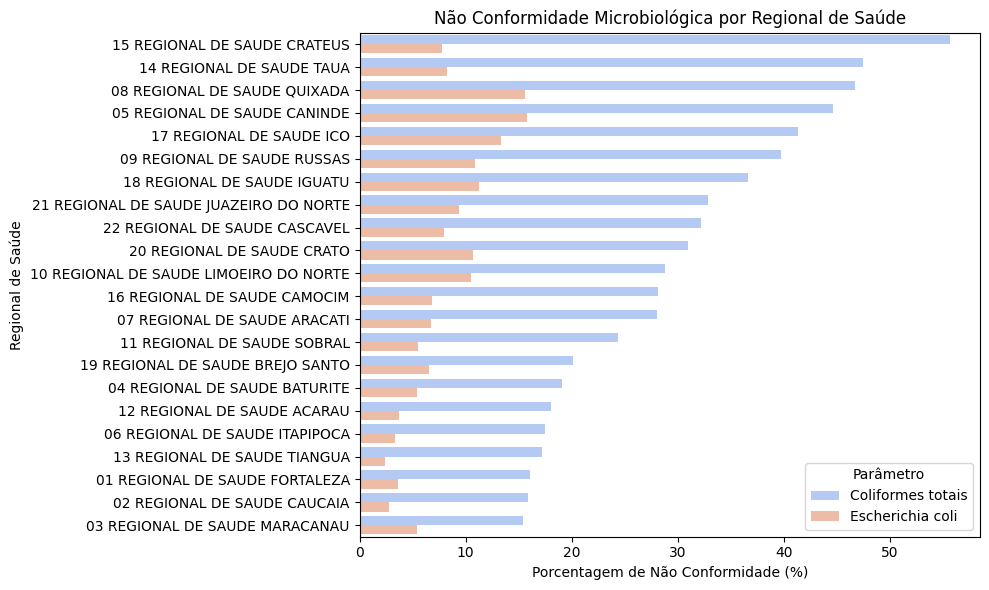

In [95]:
# Agrupar por regional de saúde
por_regional = df_micro.groupby([
    'regional_de_saude',
    'parametro',
    'conformidade'
]).size().unstack().fillna(0)

# Calcular % não conforme
por_regional['%_não_conforme'] = (por_regional['NÃO CONFORME'] / 
                                 (por_regional['CONFORME'] + por_regional['NÃO CONFORME'])) * 100

# Ordenar
por_regional = por_regional.sort_values('%_não_conforme', ascending=False)

# Plotar
plt.figure(figsize=(10, 6))
sns.barplot(
    y=por_regional.index.get_level_values('regional_de_saude'),
    x=por_regional['%_não_conforme'],
    hue=por_regional.index.get_level_values('parametro'),
    palette='coolwarm'
)
plt.title('Não Conformidade Microbiológica por Regional de Saúde')
plt.xlabel('Porcentagem de Não Conformidade (%)')
plt.ylabel('Regional de Saúde')
plt.legend(title='Parâmetro')
plt.tight_layout()
plt.show()

In [99]:
# Filtrar apenas municípios da RMF e parâmetros microbiológicos
df_rmf = df_saa_2024[
    (df_saa_2024['municipio'].isin(municipios_rmf)) & 
    (df_saa_2024['parametro'].isin(['Escherichia coli', 'Coliformes totais']))
].copy()

# Verificar distribuição
print(f"Amostras na RMF: {len(df_rmf)}")
print(df_rmf['municipio'].value_counts())

Amostras na RMF: 10959
municipio
FORTALEZA                  1884
MARACANAU                  1257
MARANGUAPE                 1249
CAUCAIA                    1051
PACATUBA                    883
EUSEBIO                     713
HORIZONTE                   663
GUAIUBA                     597
SAO GONCALO DO AMARANTE     563
CHOROZINHO                  521
PACAJUS                     477
ITAITINGA                   476
PINDORETAMA                 367
AQUIRAZ                     258
Name: count, dtype: int64


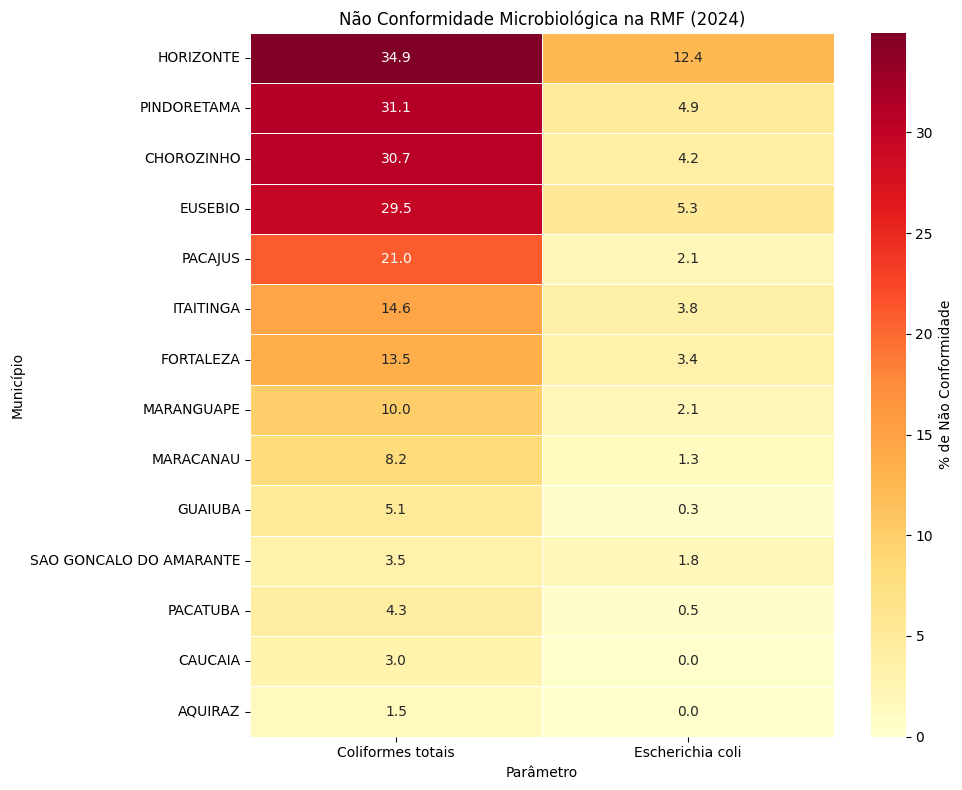

In [101]:
# Agrupar por município e parâmetro
heatmap_data = df_rmf.groupby([
    'municipio',
    'parametro'
])['conformidade'].apply(lambda x: (x == 'NÃO CONFORME').mean() * 100).unstack()

# Ordenar municípios por não conformidade total
heatmap_data['total'] = heatmap_data.mean(axis=1)
heatmap_data = heatmap_data.sort_values('total', ascending=False).drop(columns='total')

# Plotar mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.1f',
    cmap='YlOrRd',
    linewidths=.5,
    cbar_kws={'label': '% de Não Conformidade'}
)
plt.title('Não Conformidade Microbiológica na RMF (2024)')
plt.xlabel('Parâmetro')
plt.ylabel('Município')
plt.tight_layout()
plt.show()

In [107]:
# Classificar meses em períodos chuvosos/secos (ajuste conforme realidade do Ceará)
df_rmf['periodo'] = df_rmf['mes'].apply(
    lambda x: 'Chuvoso' if x in [1, 2, 3, 4, 5, 6] else 'Seco'
)

# Análise por período - corrigindo a estrutura do groupby
sazonalidade = df_rmf.groupby([
    'parametro',  # Primeiro o parâmetro
    'periodo',    # Depois o período
    'conformidade'
]).size().unstack().fillna(0)

# Verificar a estrutura resultante
print("\nEstrutura do DataFrame sazonalidade:")
print(sazonalidade)

# Calcular porcentagem de não conformidade
sazonalidade['%_não_conforme'] = (sazonalidade['NÃO CONFORME'] / 
                                 (sazonalidade['CONFORME'] + sazonalidade['NÃO CONFORME'])) * 100

print("\nDiferença na não conformidade entre períodos:")
print(sazonalidade['%_não_conforme'].unstack())

# Teste estatístico - versão mais robusta
from scipy.stats import chi2_contingency

print("\nTestes de significância estatística:")

# Verificar se os parâmetros existem no DataFrame
parametros_presentes = df_rmf['parametro'].unique()
print("Parâmetros encontrados:", parametros_presentes)

for param in ['Escherichia coli', 'Coliformes totais']:
    if param in sazonalidade.index.get_level_values('parametro'):
        try:
            # Selecionar os dados para o parâmetro atual
            table = sazonalidade.loc[param, ['CONFORME', 'NÃO CONFORME']]
            
            # Verificar se a tabela não está vazia
            if not table.empty:
                chi2, p, _, _ = chi2_contingency(table)
                print(f"\n{param}: p-valor = {p:.4f} ({'significativo' if p < 0.05 else 'não significativo'})")
                print("Tabela de contingência:")
                print(table)
            else:
                print(f"\n{param}: Nenhum dado disponível para análise")
        except Exception as e:
            print(f"\nErro ao processar {param}: {str(e)}")
    else:
        print(f"\n{param}: Parâmetro não encontrado no DataFrame")


Estrutura do DataFrame sazonalidade:
conformidade               CONFORME  NÃO CONFORME
parametro         periodo                        
Coliformes totais Chuvoso      2267           472
                  Seco         2471           274
Escherichia coli  Chuvoso      2641           115
                  Seco         2679            40

Diferença na não conformidade entre períodos:
periodo              Chuvoso      Seco
parametro                             
Coliformes totais  17.232567  9.981785
Escherichia coli    4.172714  1.471129

Testes de significância estatística:
Parâmetros encontrados: ['Escherichia coli' 'Coliformes totais']

Escherichia coli: p-valor = 0.0000 (significativo)
Tabela de contingência:
conformidade  CONFORME  NÃO CONFORME
periodo                             
Chuvoso           2641           115
Seco              2679            40

Coliformes totais: p-valor = 0.0000 (significativo)
Tabela de contingência:
conformidade  CONFORME  NÃO CONFORME
periodo           

<Figure size 1000x600 with 0 Axes>

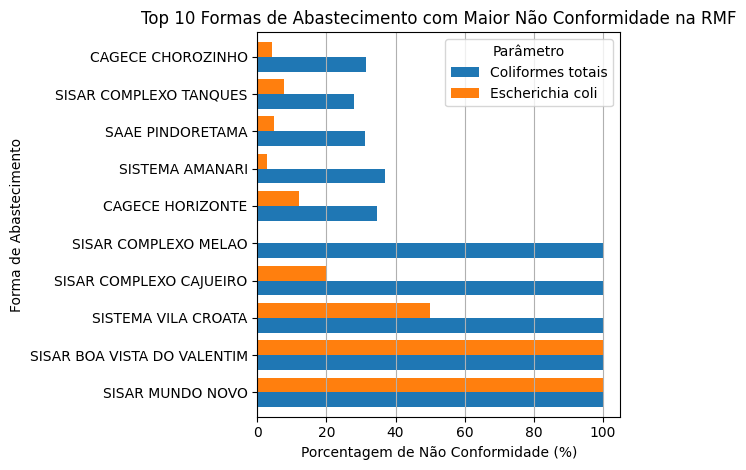

In [104]:
# Top 10 formas de abastecimento com maior não conformidade
top_formas = df_rmf.groupby([
    'nome_da_forma_de_abastecimento',
    'parametro'
])['conformidade'].apply(lambda x: (x == 'NÃO CONFORME').mean() * 100).unstack()

top_formas['media'] = top_formas.mean(axis=1)
top_formas = top_formas.sort_values('media', ascending=False).head(10).drop(columns='media')

# Plotar
plt.figure(figsize=(10, 6))
top_formas.plot(kind='barh', stacked=False, width=0.8)
plt.title('Top 10 Formas de Abastecimento com Maior Não Conformidade na RMF')
plt.xlabel('Porcentagem de Não Conformidade (%)')
plt.ylabel('Forma de Abastecimento')
plt.legend(title='Parâmetro')
plt.grid(axis='x')
plt.tight_layout()
plt.show()